# Comparing Optimization with n.opimize and optimize.optimize_with_rolling_horizon

In the first scenario a pypsa-eur network consists of 3 buses in germany is imported. The offwind is cut and the emission constraint is set to 1000000. Marginal cost of load shedding is also set at 3000 €/MWh

In [304]:
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
from pypsa.plot import add_legend_patches
import gurobipy
import cartopy.crs as ccrs
from pypsa.optimization import optimize
import matplotlib.cm as cm
import numpy as np

pd.set_option("display.max_rows", None)  # Display all rows
pd.set_option("display.max_columns", None)  # Display all columns


In [305]:
n = pypsa.Network("C:\\Users\\Jeremy\\Documents\\MasterThesis\\Models\\Model_DE\\3nodes\\elec_s_3_ec_lv1.5_Co2L0.45-3h.nc")


INFO:pypsa.io:Imported network elec_s_3_ec_lv1.5_Co2L0.45-3h.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [306]:
n.global_constraints

,type,carrier_attribute,sense,constant,mu,investment_period
GlobalConstraint,,,,,,
CO2Limit,primary_energy,co2_emissions,<=,2.335500e+08,-6.024187e+00,NaN
lv_limit,transmission_volume_expansion_limit,"AC, DC",<=,3.971510e+07,-3.946526e-12,NaN


In [307]:
#so2 emission limit
n.global_constraints.loc['CO2Limit','constant']=1000000

#cut offwind
for column in n.generators_t.p_max_pu.columns:
        if column.endswith('offwind-ac') or column.endswith('offwind-dc'):
                for index,row in n.generators_t.p_max_pu[column].items():
                        new_p_max_pu = n.generators_t.p_max_pu.at[index, column] * 0.0 #0.9
                        n.generators_t.p_max_pu.at[index, column] = new_p_max_pu

In [308]:
# set marginal cost of load shedding to 3000€/MWh
for bus in n.generators.bus:
    for index in n.generators.index:
        if not bus.endswith('H2') and index.endswith('load'):
            n.generators.loc[index, 'marginal_cost'] = 3000

#edit load shedding's unit from kW to MW
for index in n.generators.index:
    if index.endswith('load') and not index.endswith('H2 load'):
        n.generators.loc[index, 'sign'] = 1

In [309]:
n.optimize.create_model()
n.optimize.solve_model(solver_name='gurobi')

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 15/15 [00:00<00:00, 15.66it/s]
INFO:linopy.io: Writing time: 6.66s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kadcg1xx.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kadcg1xx.lp


Reading time = 2.13 seconds


INFO:gurobipy:Reading time = 2.13 seconds


obj: 511049 rows, 242381 columns, 984926 nonzeros


INFO:gurobipy:obj: 511049 rows, 242381 columns, 984926 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 511049 rows, 242381 columns and 984926 nonzeros


INFO:gurobipy:Optimize a model with 511049 rows, 242381 columns and 984926 nonzeros


Model fingerprint: 0xc4acccd7


INFO:gurobipy:Model fingerprint: 0xc4acccd7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [3e+01, 9e+09]


INFO:gurobipy:  Bounds range     [3e+01, 9e+09]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 364211 rows and 54682 columns


INFO:gurobipy:Presolve removed 364211 rows and 54682 columns


Presolve time: 0.88s


INFO:gurobipy:Presolve time: 0.88s


Presolved: 146838 rows, 187699 columns, 548518 nonzeros


INFO:gurobipy:Presolved: 146838 rows, 187699 columns, 548518 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.18s


INFO:gurobipy:Ordering time: 0.18s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 27


INFO:gurobipy: Dense cols : 27


 AA' NZ     : 4.484e+05


INFO:gurobipy: AA' NZ     : 4.484e+05


 Factor NZ  : 2.116e+06 (roughly 150 MB of memory)


INFO:gurobipy: Factor NZ  : 2.116e+06 (roughly 150 MB of memory)


 Factor Ops : 7.035e+07 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.035e+07 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.89401218e+19 -7.33721163e+19  1.96e+13 2.04e+06  3.21e+15     2s


INFO:gurobipy:   0   1.89401218e+19 -7.33721163e+19  1.96e+13 2.04e+06  3.21e+15     2s


   1   1.52738199e+19 -2.44839351e+19  1.65e+13 5.72e+05  1.87e+15     2s


INFO:gurobipy:   1   1.52738199e+19 -2.44839351e+19  1.65e+13 5.72e+05  1.87e+15     2s


   2   1.26565333e+19 -1.68720323e+19  1.34e+13 2.72e+05  1.40e+15     2s


INFO:gurobipy:   2   1.26565333e+19 -1.68720323e+19  1.34e+13 2.72e+05  1.40e+15     2s


   3   6.20643753e+18 -9.13902457e+18  6.26e+12 6.68e+04  6.42e+14     2s


INFO:gurobipy:   3   6.20643753e+18 -9.13902457e+18  6.26e+12 6.68e+04  6.42e+14     2s


   4   1.58388096e+18 -2.31887968e+18  1.56e+12 9.25e+03  1.56e+14     2s


INFO:gurobipy:   4   1.58388096e+18 -2.31887968e+18  1.56e+12 9.25e+03  1.56e+14     2s


   5   5.64257812e+17 -8.38289384e+17  5.10e+11 2.55e+03  5.21e+13     3s


INFO:gurobipy:   5   5.64257812e+17 -8.38289384e+17  5.10e+11 2.55e+03  5.21e+13     3s


   6   7.63356659e+16 -8.46867672e+16  1.55e+10 9.78e+01  1.88e+12     3s


INFO:gurobipy:   6   7.63356659e+16 -8.46867672e+16  1.55e+10 9.78e+01  1.88e+12     3s


   7   2.72393641e+16 -2.58160188e+16  2.43e+09 2.72e+01  3.56e+11     3s


INFO:gurobipy:   7   2.72393641e+16 -2.58160188e+16  2.43e+09 2.72e+01  3.56e+11     3s


   8   5.74633703e+15 -1.02782842e+16  4.10e+08 7.95e+00  7.65e+10     3s


INFO:gurobipy:   8   5.74633703e+15 -1.02782842e+16  4.10e+08 7.95e+00  7.65e+10     3s


   9   1.30942609e+15 -3.60516756e+15  5.67e+07 1.76e+00  1.68e+10     4s


INFO:gurobipy:   9   1.30942609e+15 -3.60516756e+15  5.67e+07 1.76e+00  1.68e+10     4s


  10   1.63242430e+14 -8.23268307e+14  3.57e+06 1.95e-01  2.65e+09     4s


INFO:gurobipy:  10   1.63242430e+14 -8.23268307e+14  3.57e+06 1.95e-01  2.65e+09     4s


  11   9.93829793e+12 -1.80319426e+14  1.63e+05 3.96e-02  4.80e+08     4s


INFO:gurobipy:  11   9.93829793e+12 -1.80319426e+14  1.63e+05 3.96e-02  4.80e+08     4s


  12   3.23929776e+12 -4.44048525e+13  3.81e+04 9.40e-03  1.19e+08     4s


INFO:gurobipy:  12   3.23929776e+12 -4.44048525e+13  3.81e+04 9.40e-03  1.19e+08     4s


  13   1.65032692e+12 -1.61452878e+13  1.67e+04 3.40e-03  4.44e+07     4s


INFO:gurobipy:  13   1.65032692e+12 -1.61452878e+13  1.67e+04 3.40e-03  4.44e+07     4s


  14   6.37434118e+11 -4.62494169e+12  4.14e+03 9.44e-04  1.31e+07     5s


INFO:gurobipy:  14   6.37434118e+11 -4.62494169e+12  4.14e+03 9.44e-04  1.31e+07     5s


  15   3.69596656e+11 -1.96059820e+12  1.82e+03 3.96e-04  5.79e+06     5s


INFO:gurobipy:  15   3.69596656e+11 -1.96059820e+12  1.82e+03 3.96e-04  5.79e+06     5s


  16   2.06853777e+11 -9.20004978e+11  7.23e+02 1.74e-04  2.80e+06     5s


INFO:gurobipy:  16   2.06853777e+11 -9.20004978e+11  7.23e+02 1.74e-04  2.80e+06     5s


  17   1.24994639e+11 -4.14444292e+11  3.26e+02 7.42e-05  1.34e+06     5s


INFO:gurobipy:  17   1.24994639e+11 -4.14444292e+11  3.26e+02 7.42e-05  1.34e+06     5s


  18   8.34917682e+10 -9.64295107e+10  1.66e+02 1.95e-05  4.47e+05     6s


INFO:gurobipy:  18   8.34917682e+10 -9.64295107e+10  1.66e+02 1.95e-05  4.47e+05     6s


  19   6.87387048e+10 -4.61414783e+10  1.06e+02 1.18e-05  2.85e+05     6s


INFO:gurobipy:  19   6.87387048e+10 -4.61414783e+10  1.06e+02 1.18e-05  2.85e+05     6s


  20   6.28420014e+10 -2.98595433e+10  8.58e+01 9.03e-06  2.30e+05     6s


INFO:gurobipy:  20   6.28420014e+10 -2.98595433e+10  8.58e+01 9.03e-06  2.30e+05     6s


  21   5.40690994e+10 -8.36891030e+09  5.57e+01 5.81e-06  1.55e+05     6s


INFO:gurobipy:  21   5.40690994e+10 -8.36891030e+09  5.57e+01 5.81e-06  1.55e+05     6s


  22   4.93241183e+10  1.06156142e+09  3.81e+01 4.54e-06  1.20e+05     6s


INFO:gurobipy:  22   4.93241183e+10  1.06156142e+09  3.81e+01 4.54e-06  1.20e+05     6s


  23   4.74378940e+10  5.02045092e+09  3.18e+01 3.97e-06  1.05e+05     7s


INFO:gurobipy:  23   4.74378940e+10  5.02045092e+09  3.18e+01 3.97e-06  1.05e+05     7s


  24   4.31076468e+10  1.38420142e+10  1.68e+01 2.76e-06  7.27e+04     7s


INFO:gurobipy:  24   4.31076468e+10  1.38420142e+10  1.68e+01 2.76e-06  7.27e+04     7s


  25   4.11452320e+10  1.59591165e+10  1.06e+01 2.47e-06  6.26e+04     7s


INFO:gurobipy:  25   4.11452320e+10  1.59591165e+10  1.06e+01 2.47e-06  6.26e+04     7s


  26   3.95257344e+10  1.69012768e+10  6.29e+00 2.34e-06  5.62e+04     7s


INFO:gurobipy:  26   3.95257344e+10  1.69012768e+10  6.29e+00 2.34e-06  5.62e+04     7s


  27   3.84549175e+10  2.24121315e+10  3.92e+00 1.61e-06  3.99e+04     8s


INFO:gurobipy:  27   3.84549175e+10  2.24121315e+10  3.92e+00 1.61e-06  3.99e+04     8s


  28   3.81546050e+10  2.29128344e+10  3.41e+00 1.54e-06  3.79e+04     8s


INFO:gurobipy:  28   3.81546050e+10  2.29128344e+10  3.41e+00 1.54e-06  3.79e+04     8s


  29   3.71148823e+10  2.44013205e+10  2.47e+00 1.32e-06  3.16e+04     8s


INFO:gurobipy:  29   3.71148823e+10  2.44013205e+10  2.47e+00 1.32e-06  3.16e+04     8s


  30   3.63205884e+10  2.77412726e+10  1.73e+00 8.64e-07  2.13e+04     9s


INFO:gurobipy:  30   3.63205884e+10  2.77412726e+10  1.73e+00 8.64e-07  2.13e+04     9s


  31   3.60716491e+10  2.89123012e+10  1.49e+00 6.98e-07  1.78e+04     9s


INFO:gurobipy:  31   3.60716491e+10  2.89123012e+10  1.49e+00 6.98e-07  1.78e+04     9s


  32   3.56707765e+10  2.94739014e+10  1.09e+00 6.20e-07  1.54e+04     9s


INFO:gurobipy:  32   3.56707765e+10  2.94739014e+10  1.09e+00 6.20e-07  1.54e+04     9s


  33   3.54289753e+10  2.96331861e+10  9.26e-01 5.96e-07  1.44e+04    10s


INFO:gurobipy:  33   3.54289753e+10  2.96331861e+10  9.26e-01 5.96e-07  1.44e+04    10s


  34   3.51404875e+10  3.03773020e+10  7.15e-01 4.90e-07  1.18e+04    10s


INFO:gurobipy:  34   3.51404875e+10  3.03773020e+10  7.15e-01 4.90e-07  1.18e+04    10s


  35   3.49567291e+10  3.06460314e+10  4.87e-01 4.53e-07  1.07e+04    11s


INFO:gurobipy:  35   3.49567291e+10  3.06460314e+10  4.87e-01 4.53e-07  1.07e+04    11s


  36   3.47223862e+10  3.07386404e+10  1.94e-01 4.39e-07  9.90e+03    11s


INFO:gurobipy:  36   3.47223862e+10  3.07386404e+10  1.94e-01 4.39e-07  9.90e+03    11s


  37   3.45913811e+10  3.13505799e+10  3.82e-02 3.53e-07  8.05e+03    12s


INFO:gurobipy:  37   3.45913811e+10  3.13505799e+10  3.82e-02 3.53e-07  8.05e+03    12s


  38   3.45386461e+10  3.14967921e+10  3.00e-02 3.32e-07  7.56e+03    13s


INFO:gurobipy:  38   3.45386461e+10  3.14967921e+10  3.00e-02 3.32e-07  7.56e+03    13s


  39   3.43611048e+10  3.17941569e+10  4.61e-04 2.89e-07  6.38e+03    13s


INFO:gurobipy:  39   3.43611048e+10  3.17941569e+10  4.61e-04 2.89e-07  6.38e+03    13s


  40   3.42118846e+10  3.24259701e+10  3.31e-04 1.96e-07  4.44e+03    14s


INFO:gurobipy:  40   3.42118846e+10  3.24259701e+10  3.31e-04 1.96e-07  4.44e+03    14s


  41   3.41715331e+10  3.25573028e+10  2.95e-04 1.78e-07  4.01e+03    14s


INFO:gurobipy:  41   3.41715331e+10  3.25573028e+10  2.95e-04 1.78e-07  4.01e+03    14s


  42   3.40771150e+10  3.28559483e+10  2.13e-04 1.36e-07  3.03e+03    14s


INFO:gurobipy:  42   3.40771150e+10  3.28559483e+10  2.13e-04 1.36e-07  3.03e+03    14s


  43   3.40637833e+10  3.29429281e+10  2.00e-04 1.24e-07  2.78e+03    14s


INFO:gurobipy:  43   3.40637833e+10  3.29429281e+10  2.00e-04 1.24e-07  2.78e+03    14s


  44   3.39861858e+10  3.31238688e+10  1.35e-04 9.82e-08  2.14e+03    15s


INFO:gurobipy:  44   3.39861858e+10  3.31238688e+10  1.35e-04 9.82e-08  2.14e+03    15s


  45   3.39656330e+10  3.31910169e+10  1.20e-04 8.81e-08  1.92e+03    15s


INFO:gurobipy:  45   3.39656330e+10  3.31910169e+10  1.20e-04 8.81e-08  1.92e+03    15s


  46   3.39141172e+10  3.32793827e+10  8.27e-05 7.49e-08  1.58e+03    15s


INFO:gurobipy:  46   3.39141172e+10  3.32793827e+10  8.27e-05 7.49e-08  1.58e+03    15s


  47   3.38991873e+10  3.34091659e+10  7.02e-05 5.63e-08  1.22e+03    16s


INFO:gurobipy:  47   3.38991873e+10  3.34091659e+10  7.02e-05 5.63e-08  1.22e+03    16s


  48   3.38522588e+10  3.35440912e+10  3.76e-05 3.61e-08  7.66e+02    16s


INFO:gurobipy:  48   3.38522588e+10  3.35440912e+10  3.76e-05 3.61e-08  7.66e+02    16s


  49   3.38419146e+10  3.35525877e+10  4.47e-05 3.48e-08  7.19e+02    16s


INFO:gurobipy:  49   3.38419146e+10  3.35525877e+10  4.47e-05 3.48e-08  7.19e+02    16s


  50   3.38283805e+10  3.36709759e+10  4.50e-05 1.72e-08  3.91e+02    16s


INFO:gurobipy:  50   3.38283805e+10  3.36709759e+10  4.50e-05 1.72e-08  3.91e+02    16s


  51   3.38160308e+10  3.36969750e+10  5.62e-05 5.24e-08  2.96e+02    17s


INFO:gurobipy:  51   3.38160308e+10  3.36969750e+10  5.62e-05 5.24e-08  2.96e+02    17s


  52   3.38097869e+10  3.37104442e+10  3.73e-05 1.06e-07  2.47e+02    17s


INFO:gurobipy:  52   3.38097869e+10  3.37104442e+10  3.73e-05 1.06e-07  2.47e+02    17s


  53   3.38091653e+10  3.37206461e+10  3.55e-05 1.01e-07  2.20e+02    17s


INFO:gurobipy:  53   3.38091653e+10  3.37206461e+10  3.55e-05 1.01e-07  2.20e+02    17s


  54   3.38050903e+10  3.37330195e+10  3.09e-05 9.43e-08  1.79e+02    17s


INFO:gurobipy:  54   3.38050903e+10  3.37330195e+10  3.09e-05 9.43e-08  1.79e+02    17s


  55   3.38043027e+10  3.37346382e+10  2.98e-05 1.89e-07  1.73e+02    18s


INFO:gurobipy:  55   3.38043027e+10  3.37346382e+10  2.98e-05 1.89e-07  1.73e+02    18s


  56   3.38029511e+10  3.37410320e+10  2.89e-05 1.83e-07  1.54e+02    18s


INFO:gurobipy:  56   3.38029511e+10  3.37410320e+10  2.89e-05 1.83e-07  1.54e+02    18s


  57   3.38005686e+10  3.37512081e+10  2.71e-05 2.87e-07  1.23e+02    18s


INFO:gurobipy:  57   3.38005686e+10  3.37512081e+10  2.71e-05 2.87e-07  1.23e+02    18s


  58   3.37990972e+10  3.37538757e+10  2.58e-05 3.51e-07  1.12e+02    18s


INFO:gurobipy:  58   3.37990972e+10  3.37538757e+10  2.58e-05 3.51e-07  1.12e+02    18s


  59   3.37975857e+10  3.37590323e+10  2.51e-05 3.66e-07  9.58e+01    19s


INFO:gurobipy:  59   3.37975857e+10  3.37590323e+10  2.51e-05 3.66e-07  9.58e+01    19s


  60   3.37963466e+10  3.37617770e+10  2.37e-05 3.23e-07  8.59e+01    19s


INFO:gurobipy:  60   3.37963466e+10  3.37617770e+10  2.37e-05 3.23e-07  8.59e+01    19s


  61   3.37942920e+10  3.37648896e+10  2.44e-05 2.87e-07  7.30e+01    19s


INFO:gurobipy:  61   3.37942920e+10  3.37648896e+10  2.44e-05 2.87e-07  7.30e+01    19s


  62   3.37928588e+10  3.37678550e+10  1.94e-05 2.44e-07  6.21e+01    19s


INFO:gurobipy:  62   3.37928588e+10  3.37678550e+10  1.94e-05 2.44e-07  6.21e+01    19s


  63   3.37921637e+10  3.37687249e+10  1.99e-05 2.35e-07  5.82e+01    19s


INFO:gurobipy:  63   3.37921637e+10  3.37687249e+10  1.99e-05 2.35e-07  5.82e+01    19s


  64   3.37913265e+10  3.37705301e+10  1.96e-05 2.19e-07  5.17e+01    20s


INFO:gurobipy:  64   3.37913265e+10  3.37705301e+10  1.96e-05 2.19e-07  5.17e+01    20s


  65   3.37906319e+10  3.37732818e+10  1.44e-05 2.02e-07  4.31e+01    20s


INFO:gurobipy:  65   3.37906319e+10  3.37732818e+10  1.44e-05 2.02e-07  4.31e+01    20s


  66   3.37899593e+10  3.37742179e+10  1.25e-05 1.86e-07  3.91e+01    20s


INFO:gurobipy:  66   3.37899593e+10  3.37742179e+10  1.25e-05 1.86e-07  3.91e+01    20s


  67   3.37891623e+10  3.37755645e+10  1.02e-05 1.68e-07  3.38e+01    21s


INFO:gurobipy:  67   3.37891623e+10  3.37755645e+10  1.02e-05 1.68e-07  3.38e+01    21s


  68   3.37886091e+10  3.37762713e+10  8.88e-06 1.58e-07  3.07e+01    21s


INFO:gurobipy:  68   3.37886091e+10  3.37762713e+10  8.88e-06 1.58e-07  3.07e+01    21s


  69   3.37881010e+10  3.37776042e+10  7.63e-06 1.52e-07  2.61e+01    21s


INFO:gurobipy:  69   3.37881010e+10  3.37776042e+10  7.63e-06 1.52e-07  2.61e+01    21s


  70   3.37879745e+10  3.37779790e+10  7.39e-06 1.60e-07  2.48e+01    21s


INFO:gurobipy:  70   3.37879745e+10  3.37779790e+10  7.39e-06 1.60e-07  2.48e+01    21s


  71   3.37873603e+10  3.37790947e+10  5.68e-06 1.67e-07  2.05e+01    22s


INFO:gurobipy:  71   3.37873603e+10  3.37790947e+10  5.68e-06 1.67e-07  2.05e+01    22s


  72   3.37870315e+10  3.37801690e+10  4.88e-06 1.42e-07  1.70e+01    22s


INFO:gurobipy:  72   3.37870315e+10  3.37801690e+10  4.88e-06 1.42e-07  1.70e+01    22s


  73   3.37863761e+10  3.37810626e+10  3.51e-06 1.22e-07  1.32e+01    23s


INFO:gurobipy:  73   3.37863761e+10  3.37810626e+10  3.51e-06 1.22e-07  1.32e+01    23s


  74   3.37861767e+10  3.37811942e+10  3.07e-06 1.19e-07  1.24e+01    23s


INFO:gurobipy:  74   3.37861767e+10  3.37811942e+10  3.07e-06 1.19e-07  1.24e+01    23s


  75   3.37860180e+10  3.37815964e+10  2.74e-06 1.10e-07  1.10e+01    23s


INFO:gurobipy:  75   3.37860180e+10  3.37815964e+10  2.74e-06 1.10e-07  1.10e+01    23s


  76   3.37859328e+10  3.37818888e+10  2.57e-06 1.04e-07  1.00e+01    24s


INFO:gurobipy:  76   3.37859328e+10  3.37818888e+10  2.57e-06 1.04e-07  1.00e+01    24s


  77   3.37857600e+10  3.37822802e+10  2.22e-06 9.52e-08  8.65e+00    24s


INFO:gurobipy:  77   3.37857600e+10  3.37822802e+10  2.22e-06 9.52e-08  8.65e+00    24s


  78   3.37855650e+10  3.37825540e+10  1.82e-06 9.17e-08  7.48e+00    24s


INFO:gurobipy:  78   3.37855650e+10  3.37825540e+10  1.82e-06 9.17e-08  7.48e+00    24s


  79   3.37854626e+10  3.37827168e+10  1.61e-06 8.92e-08  6.82e+00    25s


INFO:gurobipy:  79   3.37854626e+10  3.37827168e+10  1.61e-06 8.92e-08  6.82e+00    25s


  80   3.37854062e+10  3.37828199e+10  1.49e-06 8.77e-08  6.43e+00    25s


INFO:gurobipy:  80   3.37854062e+10  3.37828199e+10  1.49e-06 8.77e-08  6.43e+00    25s


  81   3.37853295e+10  3.37833890e+10  1.47e-06 9.21e-08  4.82e+00    26s


INFO:gurobipy:  81   3.37853295e+10  3.37833890e+10  1.47e-06 9.21e-08  4.82e+00    26s


  82   3.37852812e+10  3.37834317e+10  1.35e-06 9.44e-08  4.60e+00    26s


INFO:gurobipy:  82   3.37852812e+10  3.37834317e+10  1.35e-06 9.44e-08  4.60e+00    26s


  83   3.37852689e+10  3.37835861e+10  1.32e-06 1.02e-07  4.18e+00    27s


INFO:gurobipy:  83   3.37852689e+10  3.37835861e+10  1.32e-06 1.02e-07  4.18e+00    27s


  84   3.37851959e+10  3.37837183e+10  1.15e-06 1.11e-07  3.67e+00    27s


INFO:gurobipy:  84   3.37851959e+10  3.37837183e+10  1.15e-06 1.11e-07  3.67e+00    27s


  85   3.37851682e+10  3.37838513e+10  1.08e-06 1.21e-07  3.27e+00    28s


INFO:gurobipy:  85   3.37851682e+10  3.37838513e+10  1.08e-06 1.21e-07  3.27e+00    28s


  86   3.37851049e+10  3.37838599e+10  9.61e-07 1.22e-07  3.10e+00    28s


INFO:gurobipy:  86   3.37851049e+10  3.37838599e+10  9.61e-07 1.22e-07  3.10e+00    28s


  87   3.37850536e+10  3.37840619e+10  8.44e-07 1.40e-07  2.47e+00    29s


INFO:gurobipy:  87   3.37850536e+10  3.37840619e+10  8.44e-07 1.40e-07  2.47e+00    29s


  88   3.37850181e+10  3.37841775e+10  7.84e-07 1.53e-07  2.09e+00    29s


INFO:gurobipy:  88   3.37850181e+10  3.37841775e+10  7.84e-07 1.53e-07  2.09e+00    29s


  89   3.37849287e+10  3.37842825e+10  6.41e-07 1.67e-07  1.61e+00    30s


INFO:gurobipy:  89   3.37849287e+10  3.37842825e+10  6.41e-07 1.67e-07  1.61e+00    30s


  90   3.37849003e+10  3.37843954e+10  5.87e-07 1.79e-07  1.26e+00    30s


INFO:gurobipy:  90   3.37849003e+10  3.37843954e+10  5.87e-07 1.79e-07  1.26e+00    30s


  91   3.37848657e+10  3.37844247e+10  5.10e-07 1.81e-07  1.10e+00    31s


INFO:gurobipy:  91   3.37848657e+10  3.37844247e+10  5.10e-07 1.81e-07  1.10e+00    31s


  92   3.37848231e+10  3.37844376e+10  4.34e-07 1.81e-07  9.62e-01    31s


INFO:gurobipy:  92   3.37848231e+10  3.37844376e+10  4.34e-07 1.81e-07  9.62e-01    31s


  93   3.37847930e+10  3.37844678e+10  3.78e-07 1.77e-07  8.12e-01    32s


INFO:gurobipy:  93   3.37847930e+10  3.37844678e+10  3.78e-07 1.77e-07  8.12e-01    32s


  94   3.37847808e+10  3.37844746e+10  3.66e-07 1.75e-07  7.64e-01    32s


INFO:gurobipy:  94   3.37847808e+10  3.37844746e+10  3.66e-07 1.75e-07  7.64e-01    32s


  95   3.37847720e+10  3.37844885e+10  3.56e-07 1.69e-07  7.08e-01    32s


INFO:gurobipy:  95   3.37847720e+10  3.37844885e+10  3.56e-07 1.69e-07  7.08e-01    32s


  96   3.37847691e+10  3.37844945e+10  3.44e-07 1.66e-07  6.86e-01    33s


INFO:gurobipy:  96   3.37847691e+10  3.37844945e+10  3.44e-07 1.66e-07  6.86e-01    33s


  97   3.37847663e+10  3.37845059e+10  3.37e-07 1.60e-07  6.50e-01    33s


INFO:gurobipy:  97   3.37847663e+10  3.37845059e+10  3.37e-07 1.60e-07  6.50e-01    33s


  98   3.37847447e+10  3.37845305e+10  3.46e-07 1.42e-07  5.35e-01    34s


INFO:gurobipy:  98   3.37847447e+10  3.37845305e+10  3.46e-07 1.42e-07  5.35e-01    34s


  99   3.37847157e+10  3.37845403e+10  2.32e-07 1.36e-07  4.39e-01    34s


INFO:gurobipy:  99   3.37847157e+10  3.37845403e+10  2.32e-07 1.36e-07  4.39e-01    34s


 100   3.37847034e+10  3.37845579e+10  2.14e-07 1.20e-07  3.64e-01    35s


INFO:gurobipy: 100   3.37847034e+10  3.37845579e+10  2.14e-07 1.20e-07  3.64e-01    35s


 101   3.37846944e+10  3.37845684e+10  1.67e-07 1.11e-07  3.15e-01    35s


INFO:gurobipy: 101   3.37846944e+10  3.37845684e+10  1.67e-07 1.11e-07  3.15e-01    35s


 102   3.37846871e+10  3.37845715e+10  3.14e-07 1.06e-07  2.89e-01    36s


INFO:gurobipy: 102   3.37846871e+10  3.37845715e+10  3.14e-07 1.06e-07  2.89e-01    36s


 103   3.37846838e+10  3.37845901e+10  3.27e-07 8.65e-08  2.34e-01    36s


INFO:gurobipy: 103   3.37846838e+10  3.37845901e+10  3.27e-07 8.65e-08  2.34e-01    36s


 104   3.37846800e+10  3.37845977e+10  3.10e-07 7.84e-08  2.06e-01    37s


INFO:gurobipy: 104   3.37846800e+10  3.37845977e+10  3.10e-07 7.84e-08  2.06e-01    37s


 105   3.37846794e+10  3.37846043e+10  3.01e-07 7.21e-08  1.88e-01    38s


INFO:gurobipy: 105   3.37846794e+10  3.37846043e+10  3.01e-07 7.21e-08  1.88e-01    38s


 106   3.37846767e+10  3.37846064e+10  2.78e-07 7.01e-08  1.76e-01    38s


INFO:gurobipy: 106   3.37846767e+10  3.37846064e+10  2.78e-07 7.01e-08  1.76e-01    38s


 107   3.37846665e+10  3.37846120e+10  1.92e-07 6.34e-08  1.36e-01    39s


INFO:gurobipy: 107   3.37846665e+10  3.37846120e+10  1.92e-07 6.34e-08  1.36e-01    39s


 108   3.37846652e+10  3.37846280e+10  1.81e-07 3.92e-07  9.27e-02    39s


INFO:gurobipy: 108   3.37846652e+10  3.37846280e+10  1.81e-07 3.92e-07  9.27e-02    39s


 109   3.37846629e+10  3.37846348e+10  1.60e-07 2.70e-07  6.99e-02    40s


INFO:gurobipy: 109   3.37846629e+10  3.37846348e+10  1.60e-07 2.70e-07  6.99e-02    40s


 110   3.37846600e+10  3.37846380e+10  9.63e-08 2.25e-07  5.48e-02    43s


INFO:gurobipy: 110   3.37846600e+10  3.37846380e+10  9.63e-08 2.25e-07  5.48e-02    43s


 111   3.37846568e+10  3.37846417e+10  6.09e-08 1.53e-07  3.75e-02    44s


INFO:gurobipy: 111   3.37846568e+10  3.37846417e+10  6.09e-08 1.53e-07  3.75e-02    44s


 112   3.37846563e+10  3.37846418e+10  5.62e-08 1.52e-07  3.60e-02    44s


INFO:gurobipy: 112   3.37846563e+10  3.37846418e+10  5.62e-08 1.52e-07  3.60e-02    44s


 113   3.37846550e+10  3.37846426e+10  4.37e-08 1.36e-07  3.07e-02    45s


INFO:gurobipy: 113   3.37846550e+10  3.37846426e+10  4.37e-08 1.36e-07  3.07e-02    45s


 114   3.37846539e+10  3.37846431e+10  7.25e-08 1.28e-07  2.69e-02    45s


INFO:gurobipy: 114   3.37846539e+10  3.37846431e+10  7.25e-08 1.28e-07  2.69e-02    45s


 115   3.37846535e+10  3.37846491e+10  6.58e-08 5.47e-08  1.06e-02    46s


INFO:gurobipy: 115   3.37846535e+10  3.37846491e+10  6.58e-08 5.47e-08  1.06e-02    46s


 116   3.37846527e+10  3.37846497e+10  5.42e-08 4.10e-08  7.10e-03    47s


INFO:gurobipy: 116   3.37846527e+10  3.37846497e+10  5.42e-08 4.10e-08  7.10e-03    47s


 117   3.37846521e+10  3.37846499e+10  3.13e-08 3.78e-08  5.20e-03    48s


INFO:gurobipy: 117   3.37846521e+10  3.37846499e+10  3.13e-08 3.78e-08  5.20e-03    48s


 118   3.37846515e+10  3.37846503e+10  2.89e-08 4.92e-08  2.67e-03    49s


INFO:gurobipy: 118   3.37846515e+10  3.37846503e+10  2.89e-08 4.92e-08  2.67e-03    49s


 119   3.37846514e+10  3.37846505e+10  3.85e-04 4.00e-08  2.04e-03    49s


INFO:gurobipy: 119   3.37846514e+10  3.37846505e+10  3.85e-04 4.00e-08  2.04e-03    49s


 120   3.37846511e+10  3.37846510e+10  4.89e-05 5.48e-08  2.35e-04    50s


INFO:gurobipy: 120   3.37846511e+10  3.37846510e+10  4.89e-05 5.48e-08  2.35e-04    50s


 121   3.37846511e+10  3.37846510e+10  4.95e-05 1.38e-08  7.24e-05    50s


INFO:gurobipy: 121   3.37846511e+10  3.37846510e+10  4.95e-05 1.38e-08  7.24e-05    50s


 122   3.37846511e+10  3.37846510e+10  1.48e-05 1.20e-08  1.50e-05    50s


INFO:gurobipy: 122   3.37846511e+10  3.37846510e+10  1.48e-05 1.20e-08  1.50e-05    50s


 123   3.37846511e+10  3.37846510e+10  6.42e-06 1.14e-08  3.02e-06    50s


INFO:gurobipy: 123   3.37846511e+10  3.37846510e+10  6.42e-06 1.14e-08  3.02e-06    50s


 124   3.37846511e+10  3.37846510e+10  1.98e-06 1.46e-08  1.04e-06    51s


INFO:gurobipy: 124   3.37846511e+10  3.37846510e+10  1.98e-06 1.46e-08  1.04e-06    51s


 125   3.37846511e+10  3.37846510e+10  1.83e-06 1.13e-08  5.23e-07    51s


INFO:gurobipy: 125   3.37846511e+10  3.37846510e+10  1.83e-06 1.13e-08  5.23e-07    51s


INFO:gurobipy:


Barrier solved model in 125 iterations and 50.87 seconds (14.06 work units)


INFO:gurobipy:Barrier solved model in 125 iterations and 50.87 seconds (14.06 work units)


Optimal objective 3.37846511e+10


INFO:gurobipy:Optimal objective 3.37846511e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   34217 DPushes remaining with DInf 0.0000000e+00                54s


INFO:gurobipy:   34217 DPushes remaining with DInf 0.0000000e+00                54s


    4798 DPushes remaining with DInf 0.0000000e+00                56s


INFO:gurobipy:    4798 DPushes remaining with DInf 0.0000000e+00                56s


       0 DPushes remaining with DInf 0.0000000e+00                58s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                58s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   29300 PPushes remaining with PInf 1.6528026e-02                58s


INFO:gurobipy:   29300 PPushes remaining with PInf 1.6528026e-02                58s


   19607 PPushes remaining with PInf 1.1771018e-02                61s


INFO:gurobipy:   19607 PPushes remaining with PInf 1.1771018e-02                61s


   16439 PPushes remaining with PInf 2.0483797e-02                67s


INFO:gurobipy:   16439 PPushes remaining with PInf 2.0483797e-02                67s


    9828 PPushes remaining with PInf 1.2282023e-02                76s


INFO:gurobipy:    9828 PPushes remaining with PInf 1.2282023e-02                76s


    7853 PPushes remaining with PInf 2.3596072e-03                80s


INFO:gurobipy:    7853 PPushes remaining with PInf 2.3596072e-03                80s


       0 PPushes remaining with PInf 0.0000000e+00                83s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                83s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0840455e+00     83s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0840455e+00     83s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   50585    3.3784651e+10   0.000000e+00   5.084045e+00     83s


INFO:gurobipy:   50585    3.3784651e+10   0.000000e+00   5.084045e+00     83s


   51037    3.3784651e+10   0.000000e+00   3.210171e-02     86s


INFO:gurobipy:   51037    3.3784651e+10   0.000000e+00   3.210171e-02     86s


   51367    3.3784651e+10   0.000000e+00   1.193431e-02     90s


INFO:gurobipy:   51367    3.3784651e+10   0.000000e+00   1.193431e-02     90s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   51569    3.3784651e+10   0.000000e+00   0.000000e+00     93s


INFO:gurobipy:   51569    3.3784651e+10   0.000000e+00   0.000000e+00     93s


INFO:gurobipy:


Solved in 51569 iterations and 92.87 seconds (35.77 work units)


INFO:gurobipy:Solved in 51569 iterations and 92.87 seconds (35.77 work units)


Optimal objective  3.378465104e+10


INFO:gurobipy:Optimal objective  3.378465104e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 242381 primals, 511049 duals
Objective: 3.38e+10
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

('ok', 'optimal')

## Results

In [310]:
def system_cost(n): #n.statistics.capex()
    tsc = n.statistics.capex() + n.statistics.opex()
    return tsc.droplevel(0).div(1e6) # million €/a

In [311]:
tot_cos_base=n.objective/1e9
system_cost_base = system_cost(n)
marg_price_region_base = n.buses_t.marginal_price.mean()
stat_base = n.statistics()

<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


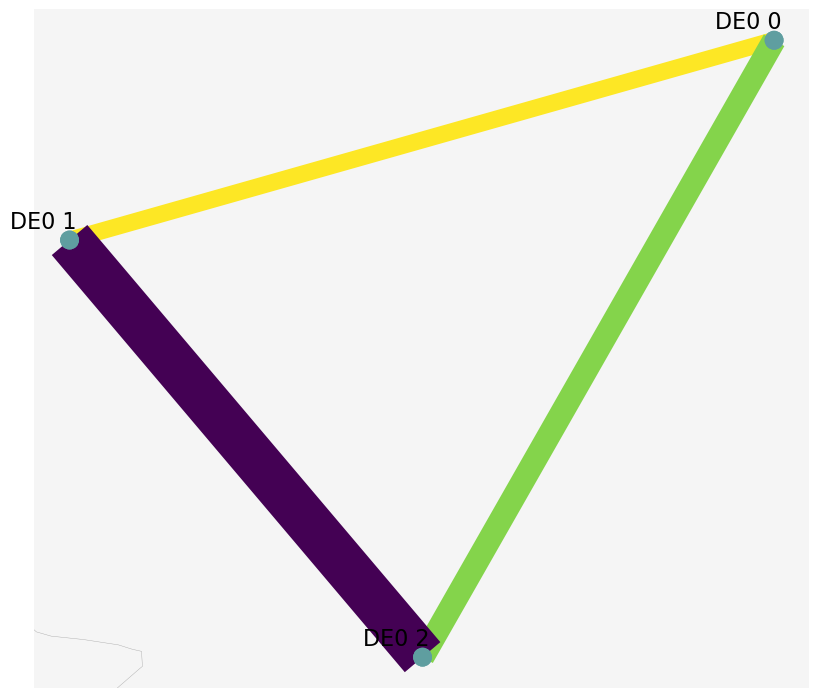

In [312]:
loading = (n.lines_t.p0.abs().mean().sort_index()/(n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

fig, ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

n.plot(
    ax=ax,
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e3, #GW
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0.003
)

bus = n.buses
region = []
for index, row in bus.iterrows():
    x = row['x']
    y = row['y']
    if "H2" in index:
        pass
    else:
        region.append(index)
        ax.annotate(
        index,
        xy=(x, y),
        xytext=(5, 5),  # Adjust the position of the annotation
        textcoords="offset points",
        ha='right', va='bottom'
    )

plt.show

## Installed Capacity Plot

In [313]:
#color list for installed cap
tech_list = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
tech_list.remove('load')
color_cap = []

for i in range(len(tech_list)):
    for j in range(len(n.carriers.index)):
        if tech_list[i] == n.carriers.index[j]:
            color_cap.append(n.carriers.color[j])
            break  # break the inner loop once a match is found  

cap = n.generators[n.generators['carrier']!='load'].groupby(['bus', 'carrier']).p_nom_opt.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_21808\3847545614.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_cap.append(n.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


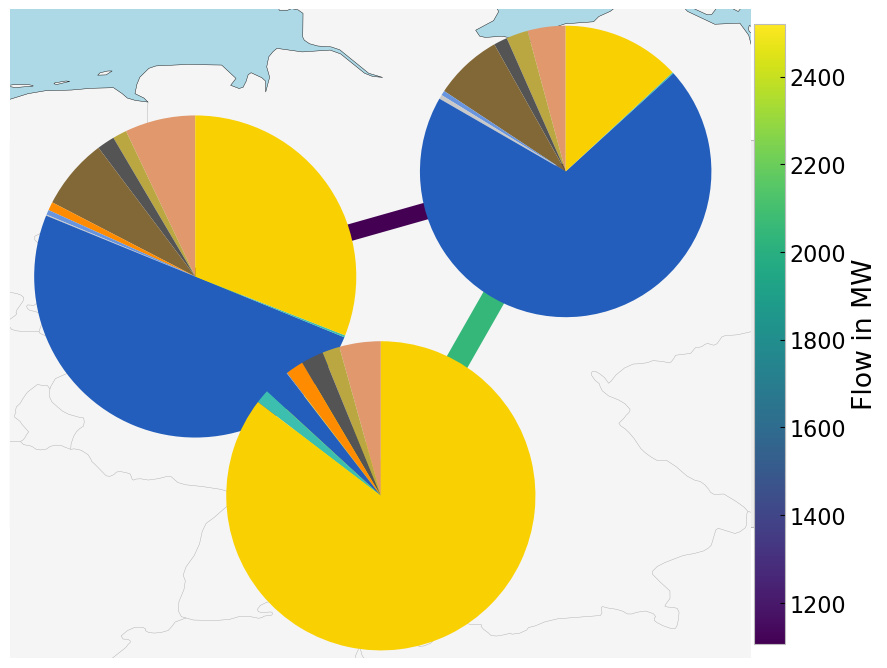

In [314]:
fig, ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

collection = n.plot(
    bus_sizes=cap / 5e4,
    bus_colors = color_cap,
    margin=0.5,
    #flow="mean",
    line_widths=n.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n.lines_t.p0.mean().abs(),
)
        
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

## Generation Map Plot

In [315]:
#color list for energy generated 
tech_list_gen_table = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
colors_gen_table = []

for i in range(len(tech_list_gen_table)):
    for j in range(len(n.carriers.index)):
        if tech_list_gen_table[i] == n.carriers.index[j]:
            colors_gen_table.append(n.carriers.color[j])
            break  # break the inner loop once a match is found 

#Adjust Load shedding's unit to MW from kW
#for column in n.generators_t.p.columns:
#    if column.endswith('load') and not column.endswith('H2 load'):
#        n.generators_t.p[column]/=1e3
        

gen = n.generators.assign(g=n.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_21808\971004373.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_gen_table.append(n.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


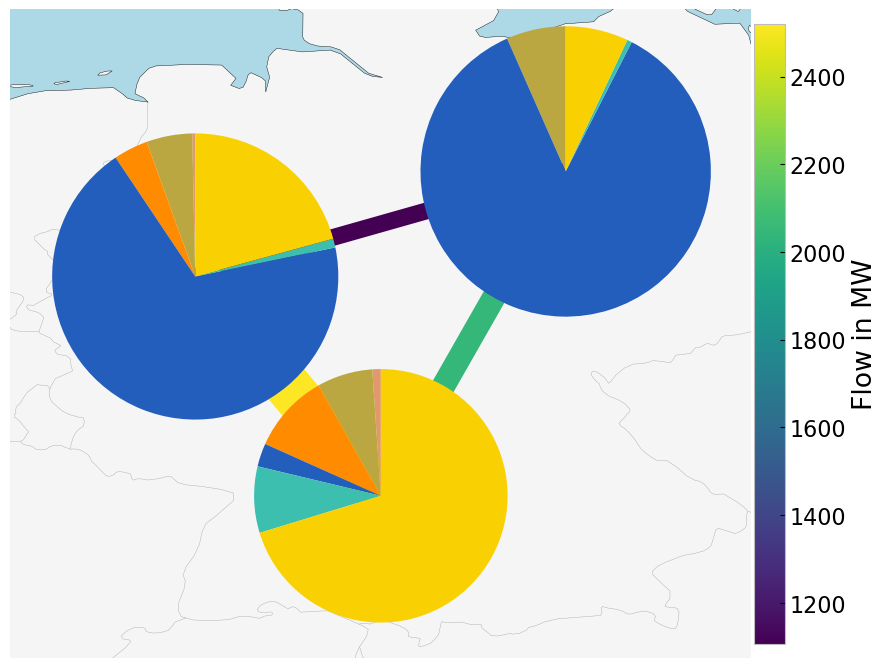

In [316]:
carriers = n.generators.carrier.unique()

plt.figure(figsize =(10,10))

collection = n.plot(
    bus_sizes=gen / 1e4,
    bus_colors = colors_gen_table,
    margin=0.5,
    #flow="mean",
    line_widths=n.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n.lines_t.p0.mean().abs(),
)
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

In [317]:
carrier = n.generators.carrier.unique()
df_tot_generation = n.generators_t.p.sum()

generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
    for tech in carrier:
        key = f"{r} {tech}"
        if key in df_tot_generation.index:
            try:
                generations.loc[r, tech] = df_tot_generation[key]
                #print(generations.loc[r, tech])
            except KeyError:
                print('error')
generations.fillna(0, inplace=True)

generations = (generations.unstack()/1000)#GWh

e = generations.sum()*1000
emission = []

for index in e.index:
    for index_c in n.carriers.index:
        if index == index_c:
            em = e[index]*n.carriers.loc[index_c,"co2_emissions"]
            emission.append(em)

df = e.to_frame()
df['emissions in Tonnes CO2'] = emission 
df.sum(axis = 0)

0                          2.046547e+08
emissions in Tonnes CO2    1.701778e+05
dtype: float64

## Capacity Bar

<Figure size 640x480 with 0 Axes>

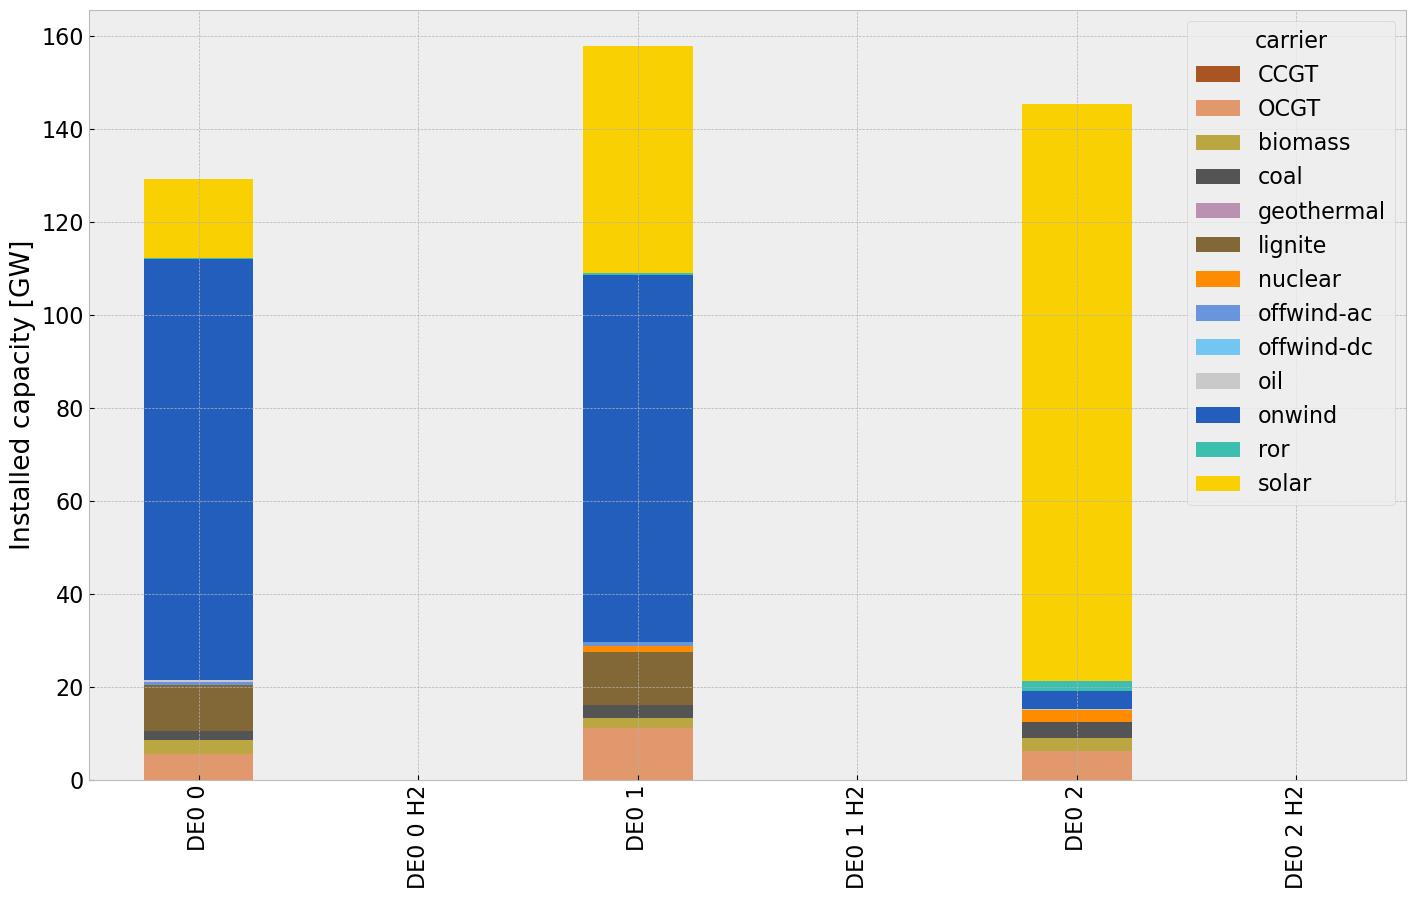

In [318]:
def inst_cap_table(n,colors):

    capacities = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
    capacities.fillna(0, inplace=True)
    gen = (capacities.unstack()/1000).drop(columns=['load'],inplace=False)
    gen.fillna(0, inplace=True)

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    gen.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                #title=f"Installed power capacity in Italy"
    )

    plt.show()
    return capacities
    
capacities_base = inst_cap_table(n, color_cap)

## Generation bar

<Figure size 640x480 with 0 Axes>

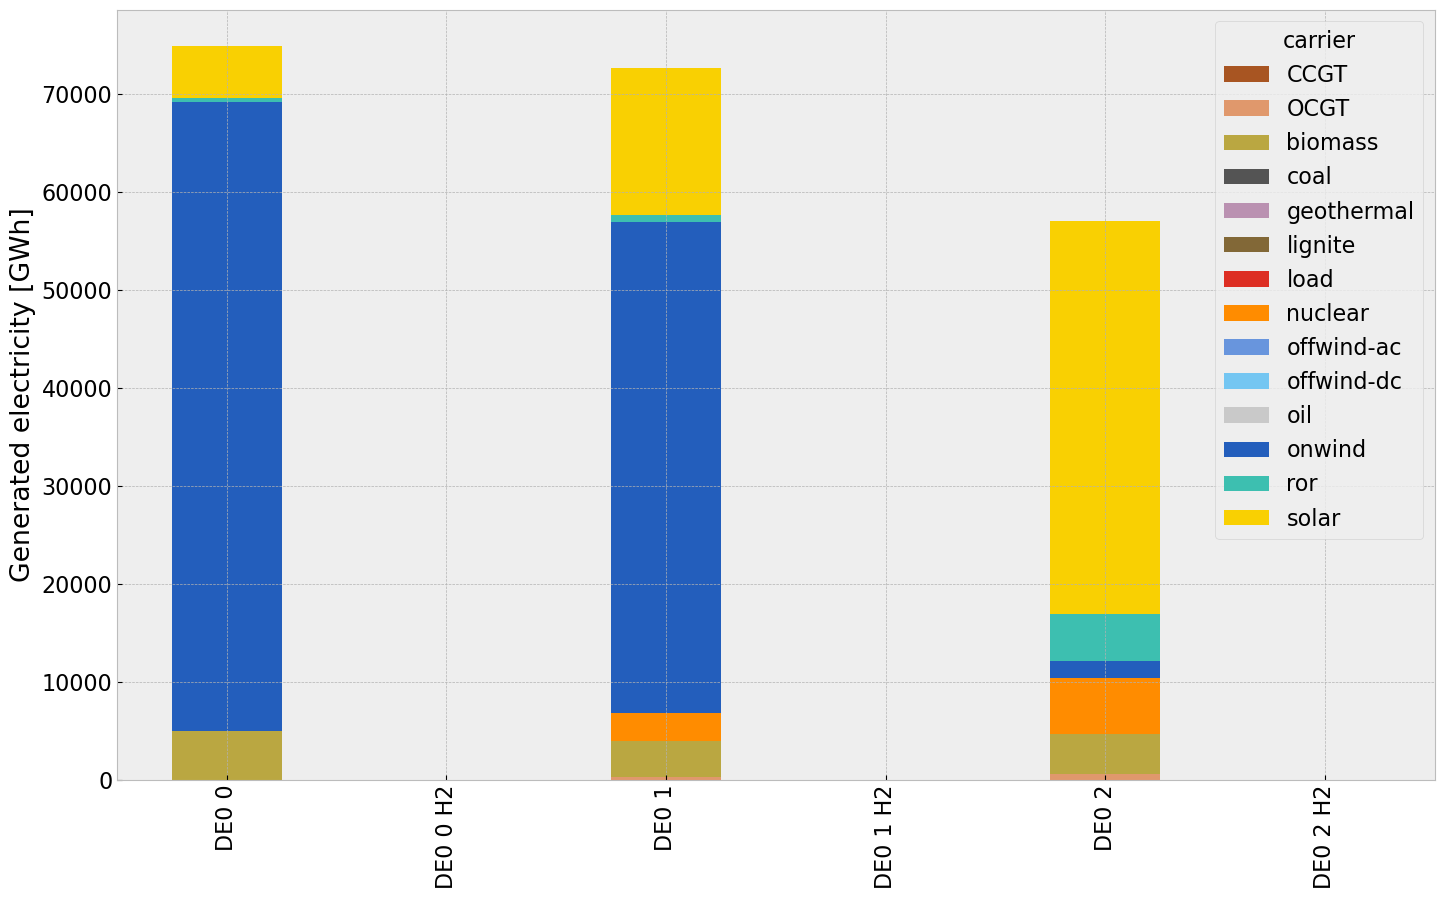

In [319]:
def gen_power_table(n, color):

    carrier = n.generators.carrier.unique()
    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                    #print(generations.loc[r, tech])
                except KeyError:
                    print('error')
    generations.fillna(0, inplace=True)

    generations = (generations.unstack()/1000)#GWh
    #generations['load']/=1e3


    plt.figure()
    plt.rcParams.update({'font.size': 16})

    generations.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=color,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                #title=f"Generated electricity in Italy in {year}"
    )

    plt.show()
    return generations
    
gen_base = gen_power_table(n,colors_gen_table)

## Emission

In [320]:
def em_table(n):
    carrier = n.generators.carrier.unique()
    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                    #print(generations.loc[r, tech])
                except KeyError:
                    print('error')
    generations.fillna(0, inplace=True)

    generations = (generations.unstack())#MWh

    #mean efficiency of each carrier
    eff = n.generators.groupby('carrier').efficiency.mean()

    e = generations.sum()
    emission = []

    for index in e.index:
        for index_c in n.carriers.index:
            for index_eff in eff.index:
                if index == index_c == index_eff:
                    em = n.carriers.loc[index_c,"co2_emissions"]
                    emission.append(em)

    df = e.to_frame()
    df.rename(columns={0: 'Generation in MWh'}, inplace=True)
    df['efficiency'] = eff
    df['emissions in Tonnes CO2/MWh'] = emission
    df['emissions in Tonnes CO2']= df['Generation in MWh']/df['efficiency']*df['emissions in Tonnes CO2/MWh']
    df['emissions in Tonnes CO2'].sum() 
    return df

em_base =em_table(n)
em_base

,Generation in MWh,efficiency,emissions in Tonnes CO2/MWh,emissions in Tonnes CO2
carrier,,,,
CCGT,0.000000e+00,0.580000,0.1980,0.000000
OCGT,8.594838e+05,0.498516,0.1980,341369.075942
biomass,1.275923e+07,0.468000,0.0000,0.000000
coal,0.000000e+00,0.329687,0.3361,0.000000
geothermal,0.000000e+00,1.000000,0.1200,0.000000
lignite,0.000000e+00,0.362723,0.4069,0.000000
load,0.000000e+00,1.000000,0.0000,0.000000
nuclear,8.601949e+06,0.328667,0.0000,0.000000
offwind-ac,0.000000e+00,1.000000,0.0000,0.000000


In [322]:
em_base['emissions in Tonnes CO2'].sum()/1e6 #Mill Tonnes CO2

0.34136907594174504

CO2 emission is at 31.4 Mill. Tonnes, which is lower than the global constraint of 90 Mill. Tonnes

In [323]:
n.generators

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,p_max_pu,weight,control,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,p_nom_opt,type,p_nom_mod,p_min_pu,p_set,q_set,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DE0 0 CCGT,CCGT,DE0 0,0.000000,0.000000e+00,False,0.580000,46.812486,104788.020783,inf,1.000,98.000000,Slack,1.000,0,0,0,1,0,0.000000e+00,,0.0,0.0,0.0,0.0,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE0 0 OCGT,OCGT,DE0 0,5447.380000,5.447380e+03,True,0.475499,57.947123,47718.670564,inf,1.000,155.000000,,1.000,0,0,0,1,0,5.447380e+03,,0.0,0.0,0.0,0.0,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE0 0 biomass,biomass,DE0 0,3116.494060,3.116494e+03,False,0.468000,15.838268,294201.051170,inf,1.000,4588.000000,,1.000,0,0,0,1,0,3.116494e+03,,0.0,0.0,0.0,0.0,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE0 0 coal,coal,DE0 0,1960.037970,1.960038e+03,False,0.328805,32.336944,337208.027448,inf,1.000,105.000000,,1.000,0,0,0,1,0,1.960038e+03,,0.0,0.0,0.0,0.0,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE0 0 geothermal,geothermal,DE0 0,0.000000,0.000000e+00,False,1.000000,0.010269,0.000000,inf,1.000,98.000000,,1.000,0,0,0,1,0,0.000000e+00,,0.0,0.0,0.0,0.0,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE0 0 lignite,lignite,DE0 0,9754.470188,9.754470e+03,False,0.392775,11.673656,337208.027448,inf,1.000,109.000000,,1.000,0,0,0,1,0,9.754470e+03,,0.0,0.0,0.0,0.0,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE0 0 nuclear,nuclear,DE0 0,0.000000,0.000000e+00,False,0.326000,14.023720,753784.215297,inf,0.871,98.000000,,1.000,0,0,0,1,0,0.000000e+00,,0.0,0.0,0.0,0.0,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE0 0 offwind-ac,offwind-ac,DE0 0,679.150000,6.791500e+02,True,1.000000,0.025222,203969.124061,3.572531e+03,1.000,1570.960880,,1.000,0,0,0,1,0,6.791500e+02,,0.0,0.0,0.0,0.0,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE0 0 offwind-dc,offwind-dc,DE0 0,0.000000,0.000000e+00,True,1.000000,0.025445,229336.401528,1.707542e+03,1.000,975.823811,,1.000,0,0,0,1,0,0.000000e+00,,0.0,0.0,0.0,0.0,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


# Rolling Horizon

In [324]:
n1 = n.copy()
n1.global_constraints.loc['CO2Limit','constant']=n.global_constraints.loc['CO2Limit','constant']/121.667

#set the optimal capacity of generators from the base scenario as the new minimum capacity 
for index, value in n1.generators.p_nom_extendable.items():
    if value:  
        n1.generators.at[index, 'p_nom'] = n.generators.at[index, 'p_nom_opt']
        n1.generators.at[index,'p_nom_extendable'] = False

#set the optimal capacity of storage units from the base scenario as the new minimum capacity 
for index, value in n1.storage_units.p_nom_extendable.items():
    if value:  
        n1.storage_units.at[index, 'p_nom'] = n.storage_units.at[index, 'p_nom_opt']
        n1.storage_units.at[index,'p_nom_extendable'] = False

#set the optimal capacity of stores from the base scenario as the new minimum capacity 
for index, value in n1.stores.e_nom_extendable.items():
    if value:  
        n1.stores.at[index, 'e_nom'] = n.stores.at[index, 'e_nom_opt']
        n1.stores.at[index, 'e_nom_extendable'] =False

#set the optimal capacity of lines from the base scenario as the new minimum capacity 
for index, value in n1.lines.s_nom_extendable.items():
    if value:  
        n1.lines.at[index, 's_nom'] = n.lines.at[index, 's_nom_opt']
        n1.lines.at[index, 's_nom_extendable'] =False

n1.optimize.create_model()
#n1.optimize.solve_model(solver_name='gurobi')
optimize.optimize_with_rolling_horizon(n1, horizon=24, overlap=0,solver_name='gurobi')

INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2013-01-01 00:00:00:2013-01-03 21:00:00] (1/122).
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8e9t5o98.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8e9t5o98.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xb4bafae5


INFO:gurobipy:Model fingerprint: 0xb4bafae5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 575 columns


INFO:gurobipy:Presolve removed 3636 rows and 575 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1426 columns, 3028 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1426 columns, 3028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     373    8.3919534e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     373    8.3919534e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 373 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 373 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.391953444e+04


INFO:gurobipy:Optimal objective  8.391953444e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.39e+04
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-t95e3qzr.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-t95e3qzr.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xae88cf49


INFO:gurobipy:Model fingerprint: 0xae88cf49


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 575 columns


INFO:gurobipy:Presolve removed 3636 rows and 575 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1426 columns, 3028 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1426 columns, 3028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     435    5.9823655e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     435    5.9823655e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 435 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 435 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.982365512e+07


INFO:gurobipy:Optimal objective  5.982365512e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.98e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-46vwbw1q.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-46vwbw1q.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf0b300d0


INFO:gurobipy:Model fingerprint: 0xf0b300d0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 578 columns


INFO:gurobipy:Presolve removed 3636 rows and 578 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1423 columns, 3025 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1423 columns, 3025 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     471    3.9385230e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     471    3.9385230e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 471 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 471 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.938523005e+09


INFO:gurobipy:Optimal objective  3.938523005e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.94e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0kih09tr.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0kih09tr.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xb91813ef


INFO:gurobipy:Model fingerprint: 0xb91813ef


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 581 columns


INFO:gurobipy:Presolve removed 3636 rows and 581 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1420 columns, 3022 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1420 columns, 3022 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     424    2.6151106e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     424    2.6151106e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 424 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 424 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.615110648e+09


INFO:gurobipy:Optimal objective  2.615110648e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.62e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-304598fz.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-304598fz.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xaa794b64


INFO:gurobipy:Model fingerprint: 0xaa794b64


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 577 columns


INFO:gurobipy:Presolve removed 3636 rows and 577 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 578 rows, 1424 columns, 3026 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1424 columns, 3026 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     444    5.5733009e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     444    5.5733009e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 444 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 444 iterations and 0.06 seconds (0.01 work units)


Optimal objective  5.573300920e+09


INFO:gurobipy:Optimal objective  5.573300920e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.57e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6voun7rf.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6voun7rf.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x2f110e35


INFO:gurobipy:Model fingerprint: 0x2f110e35


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 573 columns


INFO:gurobipy:Presolve removed 3636 rows and 573 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     439    5.4951526e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     439    5.4951526e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 439 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 439 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.495152634e+09


INFO:gurobipy:Optimal objective  5.495152634e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.50e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u7s_lllm.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u7s_lllm.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x3f2f0b38


INFO:gurobipy:Model fingerprint: 0x3f2f0b38


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 579 columns


INFO:gurobipy:Presolve removed 3636 rows and 579 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 578 rows, 1422 columns, 3024 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1422 columns, 3024 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     407    1.0199504e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     407    1.0199504e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 407 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 407 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.019950350e+05


INFO:gurobipy:Optimal objective  1.019950350e+05
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.02e+05
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9ird0emr.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9ird0emr.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xfde78077


INFO:gurobipy:Model fingerprint: 0xfde78077


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 584 columns


INFO:gurobipy:Presolve removed 3636 rows and 584 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1417 columns, 3019 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1417 columns, 3019 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     443    7.4787211e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     443    7.4787211e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 443 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 443 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.478721052e+09


INFO:gurobipy:Optimal objective  7.478721052e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.48e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-28mcvy4h.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-28mcvy4h.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xcc480d98


INFO:gurobipy:Model fingerprint: 0xcc480d98


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 576 columns


INFO:gurobipy:Presolve removed 3636 rows and 576 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1425 columns, 3027 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1425 columns, 3027 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     434    1.9641549e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     434    1.9641549e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 434 iterations and 0.10 seconds (0.01 work units)


INFO:gurobipy:Solved in 434 iterations and 0.10 seconds (0.01 work units)


Optimal objective  1.964154927e+09


INFO:gurobipy:Optimal objective  1.964154927e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.96e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6l0zpjfs.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6l0zpjfs.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc42965aa


INFO:gurobipy:Model fingerprint: 0xc42965aa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 570 columns


INFO:gurobipy:Presolve removed 3636 rows and 570 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1431 columns, 3033 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1431 columns, 3033 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     324    1.0968073e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     324    1.0968073e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 324 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 324 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.096807343e+05


INFO:gurobipy:Optimal objective  1.096807343e+05
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.10e+05
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lrl_z4zk.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lrl_z4zk.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf1d48434


INFO:gurobipy:Model fingerprint: 0xf1d48434


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 569 columns


INFO:gurobipy:Presolve removed 3636 rows and 569 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     429    2.2997296e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     429    2.2997296e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 429 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 429 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.299729615e+08


INFO:gurobipy:Optimal objective  2.299729615e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.30e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hu8l6y3q.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hu8l6y3q.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xfac42c50


INFO:gurobipy:Model fingerprint: 0xfac42c50


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 567 columns


INFO:gurobipy:Presolve removed 3636 rows and 567 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     303    9.9683446e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     303    9.9683446e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 303 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 303 iterations and 0.04 seconds (0.01 work units)


Optimal objective  9.968344559e+04


INFO:gurobipy:Optimal objective  9.968344559e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 9.97e+04
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.35s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y7mcsl48.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-y7mcsl48.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc95508cd


INFO:gurobipy:Model fingerprint: 0xc95508cd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 566 columns


INFO:gurobipy:Presolve removed 3636 rows and 566 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     392    3.3202950e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     392    3.3202950e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 392 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 392 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.320294950e+09


INFO:gurobipy:Optimal objective  3.320294950e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.32e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gm7in8qq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gm7in8qq.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc873dbfa


INFO:gurobipy:Model fingerprint: 0xc873dbfa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 578 columns


INFO:gurobipy:Presolve removed 3636 rows and 578 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1423 columns, 3025 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1423 columns, 3025 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     474    1.8296000e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     474    1.8296000e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 474 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 474 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.829599966e+09


INFO:gurobipy:Optimal objective  1.829599966e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.83e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.2s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-piy5_xag.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-piy5_xag.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6505ece6


INFO:gurobipy:Model fingerprint: 0x6505ece6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 569 columns


INFO:gurobipy:Presolve removed 3636 rows and 569 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     507    3.6802918e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     507    3.6802918e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 507 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 507 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.680291796e+09


INFO:gurobipy:Optimal objective  3.680291796e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.68e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-k8l46hvh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-k8l46hvh.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x7d5d209c


INFO:gurobipy:Model fingerprint: 0x7d5d209c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 594 columns


INFO:gurobipy:Presolve removed 3636 rows and 594 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1407 columns, 3009 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1407 columns, 3009 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     466    6.1787772e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     466    6.1787772e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 466 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 466 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.178777152e+09


INFO:gurobipy:Optimal objective  6.178777152e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.18e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4x0ita6u.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4x0ita6u.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x30ae32f3


INFO:gurobipy:Model fingerprint: 0x30ae32f3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [9e+01, 1e+09]


INFO:gurobipy:  RHS range        [9e+01, 1e+09]


Presolve removed 3636 rows and 574 columns


INFO:gurobipy:Presolve removed 3636 rows and 574 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1427 columns, 3029 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1427 columns, 3029 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     494    1.6522846e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     494    1.6522846e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 494 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 494 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.652284597e+09


INFO:gurobipy:Optimal objective  1.652284597e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.65e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hkifif3q.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hkifif3q.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x4f9f62ae


INFO:gurobipy:Model fingerprint: 0x4f9f62ae


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     497    1.3395448e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     497    1.3395448e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 497 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 497 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.339544826e+08


INFO:gurobipy:Optimal objective  1.339544826e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.34e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_k_vpxqk.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_k_vpxqk.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc48793b5


INFO:gurobipy:Model fingerprint: 0xc48793b5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 567 columns


INFO:gurobipy:Presolve removed 3636 rows and 567 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     515    1.3018854e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     515    1.3018854e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 515 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 515 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.301885428e+09


INFO:gurobipy:Optimal objective  1.301885428e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.30e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wsyhlfjw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wsyhlfjw.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6ee701af


INFO:gurobipy:Model fingerprint: 0x6ee701af


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3636 rows and 576 columns


INFO:gurobipy:Presolve removed 3636 rows and 576 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1425 columns, 3027 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1425 columns, 3027 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     447    5.7722534e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     447    5.7722534e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 447 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 447 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.772253376e+09


INFO:gurobipy:Optimal objective  5.772253376e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.77e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-j0eh2ut3.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-j0eh2ut3.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x70e0315a


INFO:gurobipy:Model fingerprint: 0x70e0315a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 573 columns


INFO:gurobipy:Presolve removed 3636 rows and 573 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     475    6.1620951e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     475    6.1620951e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 475 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 475 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.162095094e+08


INFO:gurobipy:Optimal objective  6.162095094e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.16e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xhn6y850.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xhn6y850.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x34fb7eb8


INFO:gurobipy:Model fingerprint: 0x34fb7eb8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 570 columns


INFO:gurobipy:Presolve removed 3636 rows and 570 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1431 columns, 3033 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1431 columns, 3033 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     440    8.3295399e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     440    8.3295399e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 440 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 440 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.329539933e+08


INFO:gurobipy:Optimal objective  8.329539933e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.33e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gi5h3ljc.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gi5h3ljc.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf27f33dc


INFO:gurobipy:Model fingerprint: 0xf27f33dc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     329    8.8788344e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     329    8.8788344e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 329 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 329 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.878834374e+04


INFO:gurobipy:Optimal objective  8.878834374e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.88e+04
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9lk28yyd.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9lk28yyd.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x8c92affc


INFO:gurobipy:Model fingerprint: 0x8c92affc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3636 rows and 565 columns


INFO:gurobipy:Presolve removed 3636 rows and 565 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1436 columns, 3038 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1436 columns, 3038 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     550    2.5850198e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     550    2.5850198e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 550 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 550 iterations and 0.06 seconds (0.01 work units)


Optimal objective  2.585019797e+09


INFO:gurobipy:Optimal objective  2.585019797e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.59e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-q_2t30zy.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-q_2t30zy.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x893201d0


INFO:gurobipy:Model fingerprint: 0x893201d0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     493    1.7526923e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     493    1.7526923e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 493 iterations and 0.10 seconds (0.01 work units)


INFO:gurobipy:Solved in 493 iterations and 0.10 seconds (0.01 work units)


Optimal objective  1.752692336e+09


INFO:gurobipy:Optimal objective  1.752692336e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.75e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o70n0mjl.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o70n0mjl.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xace986c2


INFO:gurobipy:Model fingerprint: 0xace986c2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 567 columns


INFO:gurobipy:Presolve removed 3636 rows and 567 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     551    2.3829956e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     551    2.3829956e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 551 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 551 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.382995626e+06


INFO:gurobipy:Optimal objective  2.382995626e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.38e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-thcngrw2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-thcngrw2.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf8b2b72a


INFO:gurobipy:Model fingerprint: 0xf8b2b72a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     468    1.8182805e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     468    1.8182805e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 468 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 468 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.818280530e+09


INFO:gurobipy:Optimal objective  1.818280530e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.82e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-b1p2s9qn.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-b1p2s9qn.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xbf384c41


INFO:gurobipy:Model fingerprint: 0xbf384c41


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     344    8.9370402e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     344    8.9370402e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 344 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 344 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.937040190e+04


INFO:gurobipy:Optimal objective  8.937040190e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.94e+04
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1bg7cit6.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1bg7cit6.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x965cbe40


INFO:gurobipy:Model fingerprint: 0x965cbe40


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     410    2.2228864e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     410    2.2228864e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 410 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 410 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.222886363e+06


INFO:gurobipy:Optimal objective  2.222886363e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.22e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ybg4qule.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ybg4qule.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x0a8f75ea


INFO:gurobipy:Model fingerprint: 0x0a8f75ea


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 568 columns


INFO:gurobipy:Presolve removed 3636 rows and 568 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     569    1.2863435e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     569    1.2863435e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 569 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 569 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.286343501e+09


INFO:gurobipy:Optimal objective  1.286343501e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.29e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4dip82_k.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4dip82_k.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa2544196


INFO:gurobipy:Model fingerprint: 0xa2544196


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     520    2.5018537e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     520    2.5018537e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 520 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 520 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.501853659e+06


INFO:gurobipy:Optimal objective  2.501853659e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.50e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_61uw1dz.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_61uw1dz.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xdc8b4f1c


INFO:gurobipy:Model fingerprint: 0xdc8b4f1c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3636 rows and 565 columns


INFO:gurobipy:Presolve removed 3636 rows and 565 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1436 columns, 3038 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1436 columns, 3038 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     509    1.7816934e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     509    1.7816934e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 509 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 509 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.781693427e+09


INFO:gurobipy:Optimal objective  1.781693427e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.78e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-l7ngr809.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-l7ngr809.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x5589a703


INFO:gurobipy:Model fingerprint: 0x5589a703


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 565 columns


INFO:gurobipy:Presolve removed 3636 rows and 565 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 578 rows, 1436 columns, 3038 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1436 columns, 3038 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     445    4.7028161e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     445    4.7028161e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 445 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 445 iterations and 0.06 seconds (0.01 work units)


Optimal objective  4.702816095e+08


INFO:gurobipy:Optimal objective  4.702816095e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.70e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ijwc3fsp.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ijwc3fsp.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc4d3e5c6


INFO:gurobipy:Model fingerprint: 0xc4d3e5c6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     541    2.4454626e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     541    2.4454626e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 541 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 541 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.445462614e+08


INFO:gurobipy:Optimal objective  2.445462614e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.45e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-39fcwg6m.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-39fcwg6m.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xbc1ed8af


INFO:gurobipy:Model fingerprint: 0xbc1ed8af


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 568 columns


INFO:gurobipy:Presolve removed 3636 rows and 568 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     413    2.5964342e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     413    2.5964342e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 413 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 413 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.596434215e+06


INFO:gurobipy:Optimal objective  2.596434215e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.60e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_b0tf0n4.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_b0tf0n4.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf2952606


INFO:gurobipy:Model fingerprint: 0xf2952606


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 569 columns


INFO:gurobipy:Presolve removed 3636 rows and 569 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     494    7.4472941e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     494    7.4472941e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 494 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 494 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.447294137e+06


INFO:gurobipy:Optimal objective  7.447294137e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.45e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-drm1sr8t.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-drm1sr8t.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x15dc91fd


INFO:gurobipy:Model fingerprint: 0x15dc91fd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 568 columns


INFO:gurobipy:Presolve removed 3636 rows and 568 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     442    1.0948183e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     442    1.0948183e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 442 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 442 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.094818317e+06


INFO:gurobipy:Optimal objective  1.094818317e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.09e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-po3z4fxg.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-po3z4fxg.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xb61c28b8


INFO:gurobipy:Model fingerprint: 0xb61c28b8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 570 columns


INFO:gurobipy:Presolve removed 3636 rows and 570 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1431 columns, 3033 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1431 columns, 3033 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     643    1.5856752e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     643    1.5856752e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 643 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 643 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.585675225e+08


INFO:gurobipy:Optimal objective  1.585675225e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.59e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ohi14n35.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ohi14n35.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x075670a0


INFO:gurobipy:Model fingerprint: 0x075670a0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 573 columns


INFO:gurobipy:Presolve removed 3636 rows and 573 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     436    6.9213017e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     436    6.9213017e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 436 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 436 iterations and 0.06 seconds (0.01 work units)


Optimal objective  6.921301710e+07


INFO:gurobipy:Optimal objective  6.921301710e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.92e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1pjhdugs.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1pjhdugs.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xaee49973


INFO:gurobipy:Model fingerprint: 0xaee49973


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3636 rows and 569 columns


INFO:gurobipy:Presolve removed 3636 rows and 569 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     543    1.6598178e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     543    1.6598178e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 543 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 543 iterations and 0.07 seconds (0.01 work units)


Optimal objective  1.659817840e+08


INFO:gurobipy:Optimal objective  1.659817840e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.66e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-csd7avtn.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-csd7avtn.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x420861fa


INFO:gurobipy:Model fingerprint: 0x420861fa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 561 columns


INFO:gurobipy:Presolve removed 3636 rows and 561 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1440 columns, 3042 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1440 columns, 3042 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     448    9.5938535e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     448    9.5938535e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 448 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 448 iterations and 0.07 seconds (0.01 work units)


Optimal objective  9.593853490e+08


INFO:gurobipy:Optimal objective  9.593853490e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 9.59e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9fn08gfw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9fn08gfw.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd11a9396


INFO:gurobipy:Model fingerprint: 0xd11a9396


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 563 columns


INFO:gurobipy:Presolve removed 3636 rows and 563 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1438 columns, 3040 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1438 columns, 3040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     536    5.1754527e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     536    5.1754527e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 536 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 536 iterations and 0.04 seconds (0.01 work units)


Optimal objective  5.175452732e+08


INFO:gurobipy:Optimal objective  5.175452732e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.18e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qtat8bay.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qtat8bay.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe866e2f3


INFO:gurobipy:Model fingerprint: 0xe866e2f3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 566 columns


INFO:gurobipy:Presolve removed 3636 rows and 566 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     565    6.1419774e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     565    6.1419774e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 565 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 565 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.141977411e+08


INFO:gurobipy:Optimal objective  6.141977411e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.14e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9bf9uex5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9bf9uex5.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x0644a33b


INFO:gurobipy:Model fingerprint: 0x0644a33b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 559 columns


INFO:gurobipy:Presolve removed 3636 rows and 559 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1442 columns, 3044 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1442 columns, 3044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     660    2.9241342e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     660    2.9241342e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 660 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 660 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.924134187e+06


INFO:gurobipy:Optimal objective  2.924134187e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.92e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3180hr2b.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3180hr2b.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x4b26c890


INFO:gurobipy:Model fingerprint: 0x4b26c890


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 557 columns


INFO:gurobipy:Presolve removed 3636 rows and 557 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1444 columns, 3046 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1444 columns, 3046 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     470    4.7033046e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     470    4.7033046e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 470 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 470 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.703304551e+07


INFO:gurobipy:Optimal objective  4.703304551e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.70e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-902q58t_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-902q58t_.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x91acfec4


INFO:gurobipy:Model fingerprint: 0x91acfec4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 557 columns


INFO:gurobipy:Presolve removed 3636 rows and 557 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1444 columns, 3046 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1444 columns, 3046 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     643    1.5447982e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     643    1.5447982e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 643 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 643 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.544798212e+08


INFO:gurobipy:Optimal objective  1.544798212e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.54e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dg39y6x9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dg39y6x9.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x497256ef


INFO:gurobipy:Model fingerprint: 0x497256ef


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 556 columns


INFO:gurobipy:Presolve removed 3636 rows and 556 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1445 columns, 3047 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1445 columns, 3047 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     510    5.4376975e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     510    5.4376975e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 510 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 510 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.437697456e+07


INFO:gurobipy:Optimal objective  5.437697456e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.44e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zhh7ilms.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zhh7ilms.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x8cef72be


INFO:gurobipy:Model fingerprint: 0x8cef72be


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     482    1.4868143e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     482    1.4868143e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 482 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 482 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.486814339e+09


INFO:gurobipy:Optimal objective  1.486814339e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.49e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hizb74pr.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hizb74pr.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xfdcf0925


INFO:gurobipy:Model fingerprint: 0xfdcf0925


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 562 columns


INFO:gurobipy:Presolve removed 3636 rows and 562 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1439 columns, 3041 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1439 columns, 3041 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     502    4.9238485e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     502    4.9238485e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 502 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 502 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.923848509e+08


INFO:gurobipy:Optimal objective  4.923848509e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.92e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-brh20m9j.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-brh20m9j.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xdeaa9806


INFO:gurobipy:Model fingerprint: 0xdeaa9806


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 568 columns


INFO:gurobipy:Presolve removed 3636 rows and 568 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     528    1.2258900e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     528    1.2258900e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 528 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 528 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.225889987e+09


INFO:gurobipy:Optimal objective  1.225889987e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.23e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ufg7i37r.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ufg7i37r.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x308594a1


INFO:gurobipy:Model fingerprint: 0x308594a1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 7e+02]


INFO:gurobipy:  Bounds range     [3e+02, 7e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 557 columns


INFO:gurobipy:Presolve removed 3636 rows and 557 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1444 columns, 3046 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1444 columns, 3046 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     311    7.7197490e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     311    7.7197490e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 311 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 311 iterations and 0.06 seconds (0.01 work units)


Optimal objective  7.719748986e+04


INFO:gurobipy:Optimal objective  7.719748986e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.72e+04
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6ohfeh1z.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6ohfeh1z.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc3630012


INFO:gurobipy:Model fingerprint: 0xc3630012


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+02, 9e+02]


INFO:gurobipy:  Bounds range     [7e+02, 9e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 554 columns


INFO:gurobipy:Presolve removed 3636 rows and 554 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1447 columns, 3049 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1447 columns, 3049 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     444    1.9539980e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     444    1.9539980e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 444 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 444 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.953998044e+08


INFO:gurobipy:Optimal objective  1.953998044e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.95e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rsqa7ffq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rsqa7ffq.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe4094ca8


INFO:gurobipy:Model fingerprint: 0xe4094ca8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+02, 9e+02]


INFO:gurobipy:  Bounds range     [7e+02, 9e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 567 columns


INFO:gurobipy:Presolve removed 3636 rows and 567 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     564    3.4985761e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     564    3.4985761e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 564 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 564 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.498576069e+08


INFO:gurobipy:Optimal objective  3.498576069e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.50e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-e1o5jya7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-e1o5jya7.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6c4e95a1


INFO:gurobipy:Model fingerprint: 0x6c4e95a1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+02, 7e+02]


INFO:gurobipy:  Bounds range     [6e+02, 7e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 566 columns


INFO:gurobipy:Presolve removed 3636 rows and 566 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     517    1.7399555e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     517    1.7399555e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 517 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 517 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.739955466e+09


INFO:gurobipy:Optimal objective  1.739955466e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.74e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-obthbxqb.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-obthbxqb.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6a7c7e08


INFO:gurobipy:Model fingerprint: 0x6a7c7e08


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+02, 6e+02]


INFO:gurobipy:  Bounds range     [6e+02, 6e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 560 columns


INFO:gurobipy:Presolve removed 3636 rows and 560 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1441 columns, 3043 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1441 columns, 3043 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     475    4.5130377e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     475    4.5130377e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 475 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 475 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.513037728e+08


INFO:gurobipy:Optimal objective  4.513037728e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.51e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-w3891c1u.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-w3891c1u.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6efae766


INFO:gurobipy:Model fingerprint: 0x6efae766


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+02, 6e+02]


INFO:gurobipy:  Bounds range     [5e+02, 6e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 557 columns


INFO:gurobipy:Presolve removed 3636 rows and 557 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1444 columns, 3046 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1444 columns, 3046 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     406    1.9484600e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     406    1.9484600e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 406 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 406 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.948460048e+08


INFO:gurobipy:Optimal objective  1.948460048e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.95e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dblbwcxk.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dblbwcxk.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xee5efd8e


INFO:gurobipy:Model fingerprint: 0xee5efd8e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 558 columns


INFO:gurobipy:Presolve removed 3636 rows and 558 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1443 columns, 3045 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1443 columns, 3045 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     486    2.5814593e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     486    2.5814593e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 486 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 486 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.581459265e+08


INFO:gurobipy:Optimal objective  2.581459265e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.58e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-eo7fkirx.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-eo7fkirx.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x7c8d7d16


INFO:gurobipy:Model fingerprint: 0x7c8d7d16


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 553 columns


INFO:gurobipy:Presolve removed 3636 rows and 553 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1448 columns, 3050 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1448 columns, 3050 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     333    7.8181600e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     333    7.8181600e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 333 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 333 iterations and 0.04 seconds (0.01 work units)


Optimal objective  7.818159954e+04


INFO:gurobipy:Optimal objective  7.818159954e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.82e+04
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-25xxuy88.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-25xxuy88.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6fbbd69b


INFO:gurobipy:Model fingerprint: 0x6fbbd69b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 555 columns


INFO:gurobipy:Presolve removed 3636 rows and 555 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1446 columns, 3048 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1446 columns, 3048 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     472    2.6088900e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     472    2.6088900e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 472 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 472 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.608890014e+06


INFO:gurobipy:Optimal objective  2.608890014e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.61e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5h6iz99k.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5h6iz99k.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x243cfce4


INFO:gurobipy:Model fingerprint: 0x243cfce4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 560 columns


INFO:gurobipy:Presolve removed 3636 rows and 560 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1441 columns, 3043 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1441 columns, 3043 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     421    2.0829906e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     421    2.0829906e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 421 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 421 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.082990613e+06


INFO:gurobipy:Optimal objective  2.082990613e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.08e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-su_ex206.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-su_ex206.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x51a66a7e


INFO:gurobipy:Model fingerprint: 0x51a66a7e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 562 columns


INFO:gurobipy:Presolve removed 3636 rows and 562 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1439 columns, 3041 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1439 columns, 3041 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     407    7.7719845e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     407    7.7719845e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 407 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 407 iterations and 0.04 seconds (0.01 work units)


Optimal objective  7.771984537e+08


INFO:gurobipy:Optimal objective  7.771984537e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.77e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hlep91r2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hlep91r2.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe5bf5de9


INFO:gurobipy:Model fingerprint: 0xe5bf5de9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3636 rows and 561 columns


INFO:gurobipy:Presolve removed 3636 rows and 561 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1440 columns, 3042 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1440 columns, 3042 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     623    1.1911440e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     623    1.1911440e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 623 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 623 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.191143969e+09


INFO:gurobipy:Optimal objective  1.191143969e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.19e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bqkzxwxw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bqkzxwxw.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x65bb12eb


INFO:gurobipy:Model fingerprint: 0x65bb12eb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 558 columns


INFO:gurobipy:Presolve removed 3636 rows and 558 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1443 columns, 3045 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1443 columns, 3045 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     503    4.3953973e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     503    4.3953973e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 503 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 503 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.395397319e+07


INFO:gurobipy:Optimal objective  4.395397319e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.40e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qge9tjrv.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qge9tjrv.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd5dc7bcf


INFO:gurobipy:Model fingerprint: 0xd5dc7bcf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3636 rows and 555 columns


INFO:gurobipy:Presolve removed 3636 rows and 555 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1446 columns, 3048 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1446 columns, 3048 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     492    2.1529523e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     492    2.1529523e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 492 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 492 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.152952275e+08


INFO:gurobipy:Optimal objective  2.152952275e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.15e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-osgip0om.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-osgip0om.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xaea98b07


INFO:gurobipy:Model fingerprint: 0xaea98b07


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 566 columns


INFO:gurobipy:Presolve removed 3636 rows and 566 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     521    2.9627763e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     521    2.9627763e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 521 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 521 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.962776257e+08


INFO:gurobipy:Optimal objective  2.962776257e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.96e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-__qq4_u2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-__qq4_u2.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x1147174d


INFO:gurobipy:Model fingerprint: 0x1147174d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 572 columns


INFO:gurobipy:Presolve removed 3636 rows and 572 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1429 columns, 3031 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1429 columns, 3031 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     485    1.3782588e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     485    1.3782588e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 485 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 485 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.378258814e+09


INFO:gurobipy:Optimal objective  1.378258814e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.38e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-g9mjb_6k.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-g9mjb_6k.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x26feb9a2


INFO:gurobipy:Model fingerprint: 0x26feb9a2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [9e+01, 1e+09]


INFO:gurobipy:  RHS range        [9e+01, 1e+09]


Presolve removed 3636 rows and 556 columns


INFO:gurobipy:Presolve removed 3636 rows and 556 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1445 columns, 3047 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1445 columns, 3047 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     481    5.3496759e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     481    5.3496759e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 481 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 481 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.349675887e+07


INFO:gurobipy:Optimal objective  5.349675887e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.35e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ug5aj08l.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ug5aj08l.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x51c34126


INFO:gurobipy:Model fingerprint: 0x51c34126


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 581 columns


INFO:gurobipy:Presolve removed 3636 rows and 581 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1420 columns, 3022 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1420 columns, 3022 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     527    8.1504962e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     527    8.1504962e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 527 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 527 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.150496156e+08


INFO:gurobipy:Optimal objective  8.150496156e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.15e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4w2sidnh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4w2sidnh.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xfdf00dac


INFO:gurobipy:Model fingerprint: 0xfdf00dac


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 583 columns


INFO:gurobipy:Presolve removed 3636 rows and 583 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1418 columns, 3020 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1418 columns, 3020 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     495    2.3362586e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     495    2.3362586e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 495 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 495 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.336258649e+09


INFO:gurobipy:Optimal objective  2.336258649e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.34e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fs87u2z5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fs87u2z5.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x4ee51af6


INFO:gurobipy:Model fingerprint: 0x4ee51af6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 568 columns


INFO:gurobipy:Presolve removed 3636 rows and 568 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     522    1.6324242e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     522    1.6324242e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 522 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 522 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.632424163e+09


INFO:gurobipy:Optimal objective  1.632424163e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.63e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-x0iardcj.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-x0iardcj.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x350784b3


INFO:gurobipy:Model fingerprint: 0x350784b3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     465    5.8767875e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     465    5.8767875e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 465 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 465 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.876787501e+08


INFO:gurobipy:Optimal objective  5.876787501e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.88e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5a4401px.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5a4401px.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x9fc7eb54


INFO:gurobipy:Model fingerprint: 0x9fc7eb54


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 572 columns


INFO:gurobipy:Presolve removed 3636 rows and 572 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1429 columns, 3031 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1429 columns, 3031 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     505    4.1904827e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     505    4.1904827e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 505 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 505 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.190482708e+08


INFO:gurobipy:Optimal objective  4.190482708e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.19e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-mgb_nc7s.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-mgb_nc7s.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd55a5e27


INFO:gurobipy:Model fingerprint: 0xd55a5e27


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 568 columns


INFO:gurobipy:Presolve removed 3636 rows and 568 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     540    5.9356089e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     540    5.9356089e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 540 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 540 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.935608948e+08


INFO:gurobipy:Optimal objective  5.935608948e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.94e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.43s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-50a1b76d.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-50a1b76d.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc3a1316e


INFO:gurobipy:Model fingerprint: 0xc3a1316e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 570 columns


INFO:gurobipy:Presolve removed 3636 rows and 570 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1431 columns, 3033 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1431 columns, 3033 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     574    1.6084558e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     574    1.6084558e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 574 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 574 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.608455756e+09


INFO:gurobipy:Optimal objective  1.608455756e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.61e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-81ueolu3.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-81ueolu3.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x7a7553d4


INFO:gurobipy:Model fingerprint: 0x7a7553d4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     442    2.2499145e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     442    2.2499145e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 442 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 442 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.249914517e+06


INFO:gurobipy:Optimal objective  2.249914517e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.25e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2dwwm48w.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2dwwm48w.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x25e02267


INFO:gurobipy:Model fingerprint: 0x25e02267


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 577 columns


INFO:gurobipy:Presolve removed 3636 rows and 577 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1424 columns, 3026 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1424 columns, 3026 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     549    5.5311378e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     549    5.5311378e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 549 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 549 iterations and 0.04 seconds (0.01 work units)


Optimal objective  5.531137803e+08


INFO:gurobipy:Optimal objective  5.531137803e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.53e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-x8dxd41d.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-x8dxd41d.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6696207f


INFO:gurobipy:Model fingerprint: 0x6696207f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 566 columns


INFO:gurobipy:Presolve removed 3636 rows and 566 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     630    6.0867593e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     630    6.0867593e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 630 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 630 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.086759311e+08


INFO:gurobipy:Optimal objective  6.086759311e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.09e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bkqlxrhy.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bkqlxrhy.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf3876a95


INFO:gurobipy:Model fingerprint: 0xf3876a95


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 578 columns


INFO:gurobipy:Presolve removed 3636 rows and 578 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1423 columns, 3025 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1423 columns, 3025 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     569    2.0626320e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     569    2.0626320e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 569 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 569 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.062631988e+09


INFO:gurobipy:Optimal objective  2.062631988e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.06e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-01h1sies.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-01h1sies.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd4943102


INFO:gurobipy:Model fingerprint: 0xd4943102


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     425    1.2296265e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     425    1.2296265e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 425 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 425 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.229626479e+06


INFO:gurobipy:Optimal objective  1.229626479e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.23e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hwooa1n4.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hwooa1n4.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe0030849


INFO:gurobipy:Model fingerprint: 0xe0030849


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 568 columns


INFO:gurobipy:Presolve removed 3636 rows and 568 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     516    1.3074587e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     516    1.3074587e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 516 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 516 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.307458738e+09


INFO:gurobipy:Optimal objective  1.307458738e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.31e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lbq2ww73.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lbq2ww73.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x1baaf40c


INFO:gurobipy:Model fingerprint: 0x1baaf40c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 583 columns


INFO:gurobipy:Presolve removed 3636 rows and 583 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1418 columns, 3020 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1418 columns, 3020 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     504    1.2902376e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     504    1.2902376e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 504 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 504 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.290237567e+09


INFO:gurobipy:Optimal objective  1.290237567e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.29e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zeem_sw2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zeem_sw2.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x50a12506


INFO:gurobipy:Model fingerprint: 0x50a12506


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     413    3.2531552e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     413    3.2531552e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 413 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 413 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.253155151e+08


INFO:gurobipy:Optimal objective  3.253155151e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.25e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-esf4mio1.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-esf4mio1.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xb1b3ec61


INFO:gurobipy:Model fingerprint: 0xb1b3ec61


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 577 columns


INFO:gurobipy:Presolve removed 3636 rows and 577 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1424 columns, 3026 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1424 columns, 3026 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     477    8.5484252e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     477    8.5484252e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 477 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 477 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.548425176e+08


INFO:gurobipy:Optimal objective  8.548425176e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.55e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kt508r3d.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kt508r3d.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 1993 columns, 7495 nonzeros


INFO:gurobipy:obj: 4214 rows, 1993 columns, 7495 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 1993 columns and 7495 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 1993 columns and 7495 nonzeros


Model fingerprint: 0x5669aa56


INFO:gurobipy:Model fingerprint: 0x5669aa56


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+01, 1e+02]


INFO:gurobipy:  Bounds range     [3e+01, 1e+02]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 3642 rows and 602 columns


INFO:gurobipy:Presolve removed 3642 rows and 602 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 572 rows, 1391 columns, 2987 nonzeros


INFO:gurobipy:Presolved: 572 rows, 1391 columns, 2987 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     547    4.5313338e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     547    4.5313338e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 547 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 547 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.531333849e+08


INFO:gurobipy:Optimal objective  4.531333849e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1993 primals, 4214 duals
Objective: 4.53e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-w4admmaq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-w4admmaq.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd065d344


INFO:gurobipy:Model fingerprint: 0xd065d344


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3636 rows and 569 columns


INFO:gurobipy:Presolve removed 3636 rows and 569 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     625    2.1526425e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     625    2.1526425e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 625 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 625 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.152642523e+09


INFO:gurobipy:Optimal objective  2.152642523e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.15e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kzzajxm6.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-kzzajxm6.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x511fabb6


INFO:gurobipy:Model fingerprint: 0x511fabb6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 567 columns


INFO:gurobipy:Presolve removed 3636 rows and 567 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     516    1.1050711e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     516    1.1050711e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 516 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 516 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.105071136e+09


INFO:gurobipy:Optimal objective  1.105071136e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.11e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-neu5o5j4.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-neu5o5j4.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x28a354fd


INFO:gurobipy:Model fingerprint: 0x28a354fd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     486    4.6184693e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     486    4.6184693e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 486 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 486 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.618469309e+08


INFO:gurobipy:Optimal objective  4.618469309e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.62e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-79o6zomv.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-79o6zomv.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6e935d6a


INFO:gurobipy:Model fingerprint: 0x6e935d6a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 569 columns


INFO:gurobipy:Presolve removed 3636 rows and 569 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1432 columns, 3034 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     566    6.4769615e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     566    6.4769615e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 566 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 566 iterations and 0.04 seconds (0.01 work units)


Optimal objective  6.476961508e+08


INFO:gurobipy:Optimal objective  6.476961508e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.48e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-s7wmyq49.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-s7wmyq49.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xb1907dee


INFO:gurobipy:Model fingerprint: 0xb1907dee


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 575 columns


INFO:gurobipy:Presolve removed 3636 rows and 575 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1426 columns, 3028 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1426 columns, 3028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     476    4.4184607e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     476    4.4184607e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 476 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 476 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.418460713e+08


INFO:gurobipy:Optimal objective  4.418460713e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.42e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-aa_fpp7_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-aa_fpp7_.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 1998 columns, 7500 nonzeros


INFO:gurobipy:obj: 4214 rows, 1998 columns, 7500 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 1998 columns and 7500 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 1998 columns and 7500 nonzeros


Model fingerprint: 0x227038ff


INFO:gurobipy:Model fingerprint: 0x227038ff


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+01, 1e+02]


INFO:gurobipy:  Bounds range     [3e+01, 1e+02]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 3638 rows and 579 columns


INFO:gurobipy:Presolve removed 3638 rows and 579 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 576 rows, 1419 columns, 3019 nonzeros


INFO:gurobipy:Presolved: 576 rows, 1419 columns, 3019 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     438    3.0022406e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     438    3.0022406e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 438 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 438 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.002240636e+09


INFO:gurobipy:Optimal objective  3.002240636e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1998 primals, 4214 duals
Objective: 3.00e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2ij2fhf_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2ij2fhf_.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x0738dcef


INFO:gurobipy:Model fingerprint: 0x0738dcef


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 567 columns


INFO:gurobipy:Presolve removed 3636 rows and 567 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     416    1.2536930e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     416    1.2536930e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 416 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 416 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.253693004e+06


INFO:gurobipy:Optimal objective  1.253693004e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.25e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.29s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2wkk5nt0.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2wkk5nt0.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x9a9c0dc1


INFO:gurobipy:Model fingerprint: 0x9a9c0dc1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     383    9.5526520e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     383    9.5526520e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 383 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 383 iterations and 0.04 seconds (0.01 work units)


Optimal objective  9.552652047e+04


INFO:gurobipy:Optimal objective  9.552652047e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 9.55e+04
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qnlvyg16.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qnlvyg16.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x46dde002


INFO:gurobipy:Model fingerprint: 0x46dde002


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 567 columns


INFO:gurobipy:Presolve removed 3636 rows and 567 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     508    2.0606216e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     508    2.0606216e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 508 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 508 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.060621617e+09


INFO:gurobipy:Optimal objective  2.060621617e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.06e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fkmhd3pb.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fkmhd3pb.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc8e15f15


INFO:gurobipy:Model fingerprint: 0xc8e15f15


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 576 columns


INFO:gurobipy:Presolve removed 3636 rows and 576 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1425 columns, 3027 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1425 columns, 3027 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     511    3.4333775e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     511    3.4333775e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 511 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 511 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.433377548e+09


INFO:gurobipy:Optimal objective  3.433377548e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.43e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d03oubcw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-d03oubcw.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x28888d4c


INFO:gurobipy:Model fingerprint: 0x28888d4c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 572 columns


INFO:gurobipy:Presolve removed 3636 rows and 572 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1429 columns, 3031 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1429 columns, 3031 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     582    1.3049983e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     582    1.3049983e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 582 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 582 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.304998320e+09


INFO:gurobipy:Optimal objective  1.304998320e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.30e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ehoekk79.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ehoekk79.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x7bfaee01


INFO:gurobipy:Model fingerprint: 0x7bfaee01


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3636 rows and 564 columns


INFO:gurobipy:Presolve removed 3636 rows and 564 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1437 columns, 3039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     435    4.0511160e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     435    4.0511160e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 435 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 435 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.051116037e+08


INFO:gurobipy:Optimal objective  4.051116037e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.05e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3klpzypn.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3klpzypn.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xf4a58f54


INFO:gurobipy:Model fingerprint: 0xf4a58f54


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 566 columns


INFO:gurobipy:Presolve removed 3636 rows and 566 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1435 columns, 3037 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     516    1.8452774e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     516    1.8452774e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 516 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 516 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.845277372e+09


INFO:gurobipy:Optimal objective  1.845277372e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.85e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-tde5xsus.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-tde5xsus.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd7168a4c


INFO:gurobipy:Model fingerprint: 0xd7168a4c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 565 columns


INFO:gurobipy:Presolve removed 3636 rows and 565 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1436 columns, 3038 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1436 columns, 3038 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     356    3.4742591e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     356    3.4742591e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 356 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 356 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.474259072e+05


INFO:gurobipy:Optimal objective  3.474259072e+05
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 3.47e+05
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gwnn_y7h.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gwnn_y7h.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x2ab3d139


INFO:gurobipy:Model fingerprint: 0x2ab3d139


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 567 columns


INFO:gurobipy:Presolve removed 3636 rows and 567 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     412    2.5913308e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     412    2.5913308e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 412 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 412 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.591330755e+08


INFO:gurobipy:Optimal objective  2.591330755e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.59e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-cv80k14s.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-cv80k14s.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xed24b470


INFO:gurobipy:Model fingerprint: 0xed24b470


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3636 rows and 568 columns


INFO:gurobipy:Presolve removed 3636 rows and 568 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1433 columns, 3035 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     417    1.5142429e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     417    1.5142429e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 417 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 417 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.514242884e+05


INFO:gurobipy:Optimal objective  1.514242884e+05
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.51e+05
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-99tfx28z.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-99tfx28z.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x93796c83


INFO:gurobipy:Model fingerprint: 0x93796c83


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 567 columns


INFO:gurobipy:Presolve removed 3636 rows and 567 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1434 columns, 3036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     405    1.1003451e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     405    1.1003451e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 405 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 405 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.100345084e+05


INFO:gurobipy:Optimal objective  1.100345084e+05
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.10e+05
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.21s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3oqnrftj.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3oqnrftj.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x454fbce3


INFO:gurobipy:Model fingerprint: 0x454fbce3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 572 columns


INFO:gurobipy:Presolve removed 3636 rows and 572 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1429 columns, 3031 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1429 columns, 3031 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     420    9.6648306e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     420    9.6648306e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 420 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 420 iterations and 0.05 seconds (0.01 work units)


Optimal objective  9.664830583e+04


INFO:gurobipy:Optimal objective  9.664830583e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 9.66e+04
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-puu5hhh4.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-puu5hhh4.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x3824b20c


INFO:gurobipy:Model fingerprint: 0x3824b20c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3636 rows and 571 columns


INFO:gurobipy:Presolve removed 3636 rows and 571 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1430 columns, 3032 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1430 columns, 3032 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     378    1.0380746e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     378    1.0380746e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 378 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 378 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.038074564e+05


INFO:gurobipy:Optimal objective  1.038074564e+05
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.04e+05
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1hr0wy51.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1hr0wy51.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xc81a1590


INFO:gurobipy:Model fingerprint: 0xc81a1590


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 573 columns


INFO:gurobipy:Presolve removed 3636 rows and 573 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     499    8.5591037e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     499    8.5591037e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 499 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 499 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.559103712e+08


INFO:gurobipy:Optimal objective  8.559103712e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.56e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9ghql1_t.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9ghql1_t.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6aa07a3e


INFO:gurobipy:Model fingerprint: 0x6aa07a3e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 575 columns


INFO:gurobipy:Presolve removed 3636 rows and 575 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1426 columns, 3028 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1426 columns, 3028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     471    4.6069107e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     471    4.6069107e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 471 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 471 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.606910717e+08


INFO:gurobipy:Optimal objective  4.606910717e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.61e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ov555zoc.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ov555zoc.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xd3aa4997


INFO:gurobipy:Model fingerprint: 0xd3aa4997


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 587 columns


INFO:gurobipy:Presolve removed 3636 rows and 587 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1414 columns, 3016 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1414 columns, 3016 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     492    2.7779484e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     492    2.7779484e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 492 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 492 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.777948374e+09


INFO:gurobipy:Optimal objective  2.777948374e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.78e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.38s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2ojsz_34.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2ojsz_34.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x15104ec5


INFO:gurobipy:Model fingerprint: 0x15104ec5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 579 columns


INFO:gurobipy:Presolve removed 3636 rows and 579 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1422 columns, 3024 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1422 columns, 3024 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     443    4.5010825e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     443    4.5010825e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 443 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 443 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.501082468e+09


INFO:gurobipy:Optimal objective  4.501082468e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.50e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-34pr2xgu.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-34pr2xgu.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xe2077303


INFO:gurobipy:Model fingerprint: 0xe2077303


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 578 columns


INFO:gurobipy:Presolve removed 3636 rows and 578 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1423 columns, 3025 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1423 columns, 3025 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     425    5.1107365e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     425    5.1107365e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 425 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 425 iterations and 0.04 seconds (0.01 work units)


Optimal objective  5.110736531e+09


INFO:gurobipy:Optimal objective  5.110736531e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 5.11e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ux4s065h.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ux4s065h.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6d698e10


INFO:gurobipy:Model fingerprint: 0x6d698e10


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 573 columns


INFO:gurobipy:Presolve removed 3636 rows and 573 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     392    2.9618310e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     392    2.9618310e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 392 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 392 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.961830977e+09


INFO:gurobipy:Optimal objective  2.961830977e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.96e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-p989kc87.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-p989kc87.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x621aa756


INFO:gurobipy:Model fingerprint: 0x621aa756


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3636 rows and 575 columns


INFO:gurobipy:Presolve removed 3636 rows and 575 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1426 columns, 3028 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1426 columns, 3028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     538    2.1154755e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     538    2.1154755e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 538 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 538 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.115475483e+09


INFO:gurobipy:Optimal objective  2.115475483e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 2.12e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vklckozx.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vklckozx.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x607edce9


INFO:gurobipy:Model fingerprint: 0x607edce9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [6e+01, 1e+09]


INFO:gurobipy:  RHS range        [6e+01, 1e+09]


Presolve removed 3636 rows and 579 columns


INFO:gurobipy:Presolve removed 3636 rows and 579 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1422 columns, 3024 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1422 columns, 3024 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     564    4.5768509e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     564    4.5768509e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 564 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 564 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.576850856e+06


INFO:gurobipy:Optimal objective  4.576850856e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.58e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5nh50683.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5nh50683.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x7b3e7c09


INFO:gurobipy:Model fingerprint: 0x7b3e7c09


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 578 columns


INFO:gurobipy:Presolve removed 3636 rows and 578 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1423 columns, 3025 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1423 columns, 3025 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     518    1.1060030e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     518    1.1060030e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 518 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 518 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.106002967e+09


INFO:gurobipy:Optimal objective  1.106002967e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.11e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_5b94svv.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_5b94svv.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xb354202b


INFO:gurobipy:Model fingerprint: 0xb354202b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 576 columns


INFO:gurobipy:Presolve removed 3636 rows and 576 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1425 columns, 3027 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1425 columns, 3027 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     482    9.9873109e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     482    9.9873109e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 482 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 482 iterations and 0.04 seconds (0.01 work units)


Optimal objective  9.987310867e+08


INFO:gurobipy:Optimal objective  9.987310867e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 9.99e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gyxf80vw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gyxf80vw.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x0d0c4c59


INFO:gurobipy:Model fingerprint: 0x0d0c4c59


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 573 columns


INFO:gurobipy:Presolve removed 3636 rows and 573 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     428    4.2348413e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     428    4.2348413e+05   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 428 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 428 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.234841296e+05


INFO:gurobipy:Optimal objective  4.234841296e+05
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.23e+05
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-h_jq_urn.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-h_jq_urn.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xa85c09ce


INFO:gurobipy:Model fingerprint: 0xa85c09ce


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [5e+01, 1e+09]


INFO:gurobipy:  RHS range        [5e+01, 1e+09]


Presolve removed 3636 rows and 582 columns


INFO:gurobipy:Presolve removed 3636 rows and 582 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1419 columns, 3021 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1419 columns, 3021 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     507    4.3294002e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     507    4.3294002e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 507 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 507 iterations and 0.04 seconds (0.01 work units)


Optimal objective  4.329400196e+09


INFO:gurobipy:Optimal objective  4.329400196e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 4.33e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gyowdj54.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gyowdj54.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x6f631128


INFO:gurobipy:Model fingerprint: 0x6f631128


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 3636 rows and 582 columns


INFO:gurobipy:Presolve removed 3636 rows and 582 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1419 columns, 3021 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1419 columns, 3021 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     582    1.9365348e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     582    1.9365348e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 582 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 582 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.936534816e+09


INFO:gurobipy:Optimal objective  1.936534816e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.94e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-eh7j7q0e.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-eh7j7q0e.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x8d3bac2e


INFO:gurobipy:Model fingerprint: 0x8d3bac2e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 573 columns


INFO:gurobipy:Presolve removed 3636 rows and 573 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     407    6.5984242e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     407    6.5984242e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 407 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 407 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.598424225e+08


INFO:gurobipy:Optimal objective  6.598424225e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 6.60e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r943d4xw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r943d4xw.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x19bc2a87


INFO:gurobipy:Model fingerprint: 0x19bc2a87


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [7e+01, 1e+09]


INFO:gurobipy:  RHS range        [7e+01, 1e+09]


Presolve removed 3636 rows and 574 columns


INFO:gurobipy:Presolve removed 3636 rows and 574 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1427 columns, 3029 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1427 columns, 3029 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     487    1.1710065e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     487    1.1710065e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 487 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 487 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.171006544e+06


INFO:gurobipy:Optimal objective  1.171006544e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 1.17e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vqmzt3z3.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-vqmzt3z3.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0xbaeac891


INFO:gurobipy:Model fingerprint: 0xbaeac891


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 573 columns


INFO:gurobipy:Presolve removed 3636 rows and 573 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     357    9.2342861e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     357    9.2342861e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 357 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 357 iterations and 0.05 seconds (0.01 work units)


Optimal objective  9.234286117e+04


INFO:gurobipy:Optimal objective  9.234286117e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 9.23e+04
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5v_5wzdf.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5v_5wzdf.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x8cc1d945


INFO:gurobipy:Model fingerprint: 0x8cc1d945


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [8e+01, 1e+09]


INFO:gurobipy:  RHS range        [8e+01, 1e+09]


Presolve removed 3636 rows and 573 columns


INFO:gurobipy:Presolve removed 3636 rows and 573 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1428 columns, 3030 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     609    7.2651588e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     609    7.2651588e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 609 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 609 iterations and 0.04 seconds (0.01 work units)


Optimal objective  7.265158794e+08


INFO:gurobipy:Optimal objective  7.265158794e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 7.27e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5hcdzlp1.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5hcdzlp1.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 4214 rows, 2001 columns, 7503 nonzeros


INFO:gurobipy:obj: 4214 rows, 2001 columns, 7503 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


INFO:gurobipy:Optimize a model with 4214 rows, 2001 columns and 7503 nonzeros


Model fingerprint: 0x7071ccae


INFO:gurobipy:Model fingerprint: 0x7071ccae


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 3636 rows and 574 columns


INFO:gurobipy:Presolve removed 3636 rows and 574 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 578 rows, 1427 columns, 3029 nonzeros


INFO:gurobipy:Presolved: 578 rows, 1427 columns, 3029 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     421    8.4495744e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     421    8.4495744e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 421 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 421 iterations and 0.04 seconds (0.01 work units)


Optimal objective  8.449574407e+04


INFO:gurobipy:Optimal objective  8.449574407e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2001 primals, 4214 duals
Objective: 8.45e+04
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.2s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-x_nx6bfn.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-x_nx6bfn.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 2814 rows, 1337 columns, 5007 nonzeros


INFO:gurobipy:obj: 2814 rows, 1337 columns, 5007 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 2814 rows, 1337 columns and 5007 nonzeros


INFO:gurobipy:Optimize a model with 2814 rows, 1337 columns and 5007 nonzeros


Model fingerprint: 0x32a52935


INFO:gurobipy:Model fingerprint: 0x32a52935


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e+02, 1e+09]


INFO:gurobipy:  RHS range        [1e+02, 1e+09]


Presolve removed 2428 rows and 382 columns


INFO:gurobipy:Presolve removed 2428 rows and 382 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 386 rows, 955 columns, 2021 nonzeros


INFO:gurobipy:Presolved: 386 rows, 955 columns, 2021 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     301    5.5427414e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     301    5.5427414e+04   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 301 iterations and 0.04 seconds (0.00 work units)


INFO:gurobipy:Solved in 301 iterations and 0.04 seconds (0.00 work units)


Optimal objective  5.542741357e+04


INFO:gurobipy:Optimal objective  5.542741357e+04
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1337 primals, 2814 duals
Objective: 5.54e+04
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

PyPSA Network
Components:
 - Bus: 6
 - Carrier: 23
 - Generator: 43
 - GlobalConstraint: 2
 - Line: 3
 - Link: 9
 - Load: 3
 - StorageUnit: 7
 - Store: 3
 - SubNetwork: 1
Snapshots: 2920

In [325]:
tot_cos_rol=n1.objective/1e9
system_cost_rol = system_cost(n1)
marg_price_region_rol = n1.buses_t.marginal_price.mean()
stat_rol = n1.statistics()

## Installed Capacity

In [326]:
#color list for installed cap
tech_list = n1.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
tech_list.remove('load')
color_cap = []

for i in range(len(tech_list)):
    for j in range(len(n1.carriers.index)):
        if tech_list[i] == n1.carriers.index[j]:
            color_cap.append(n1.carriers.color[j])
            break  # break the inner loop once a match is found  

cap = n1.generators[n1.generators['carrier']!='load'].groupby(['bus', 'carrier']).p_nom_opt.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_21808\2585553596.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_cap.append(n1.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


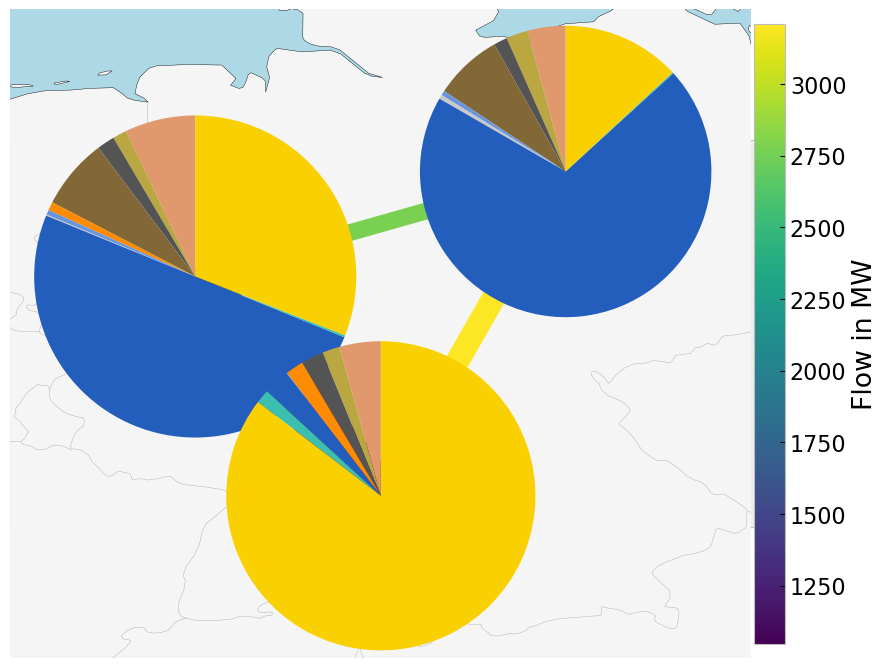

In [327]:
fig, ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

collection = n1.plot(
    bus_sizes=cap / 5e4,
    bus_colors = color_cap,
    margin=0.5,
    #flow="mean",
    line_widths=n1.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n1.lines_t.p0.mean().abs(),
)
        
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

## Generation Plot

In [328]:
#color list for energy generated 
tech_list_gen_table = n1.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
colors_gen_table = []

for i in range(len(tech_list_gen_table)):
    for j in range(len(n1.carriers.index)):
        if tech_list_gen_table[i] == n1.carriers.index[j]:
            colors_gen_table.append(n1.carriers.color[j])
            break  # break the inner loop once a match is found 

#Adjust Load shedding's unit to MW from kW
#for column in n.generators_t.p.columns:
#    if column.endswith('load') and not column.endswith('H2 load'):
#        n.generators_t.p[column]/=1e3
        

gen = n1.generators.assign(g=n1.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_21808\586822799.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_gen_table.append(n1.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


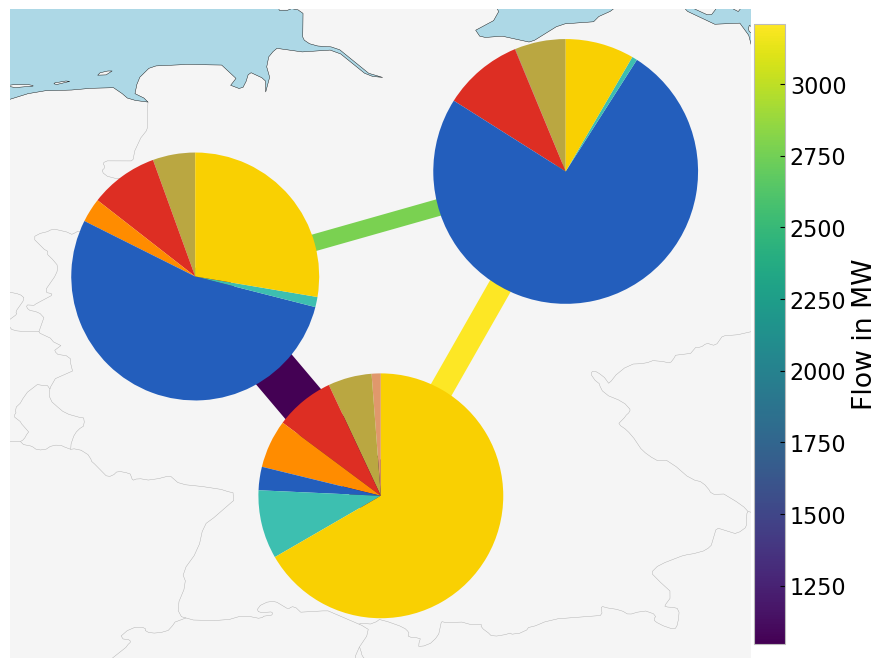

In [329]:
carriers = n1.generators.carrier.unique()

plt.figure(figsize =(10,10))

collection = n1.plot(
    bus_sizes=gen / 1e4,
    bus_colors = colors_gen_table,
    margin=0.5,
    #flow="mean",
    line_widths=n1.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n1.lines_t.p0.mean().abs(),
)
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

<Figure size 640x480 with 0 Axes>

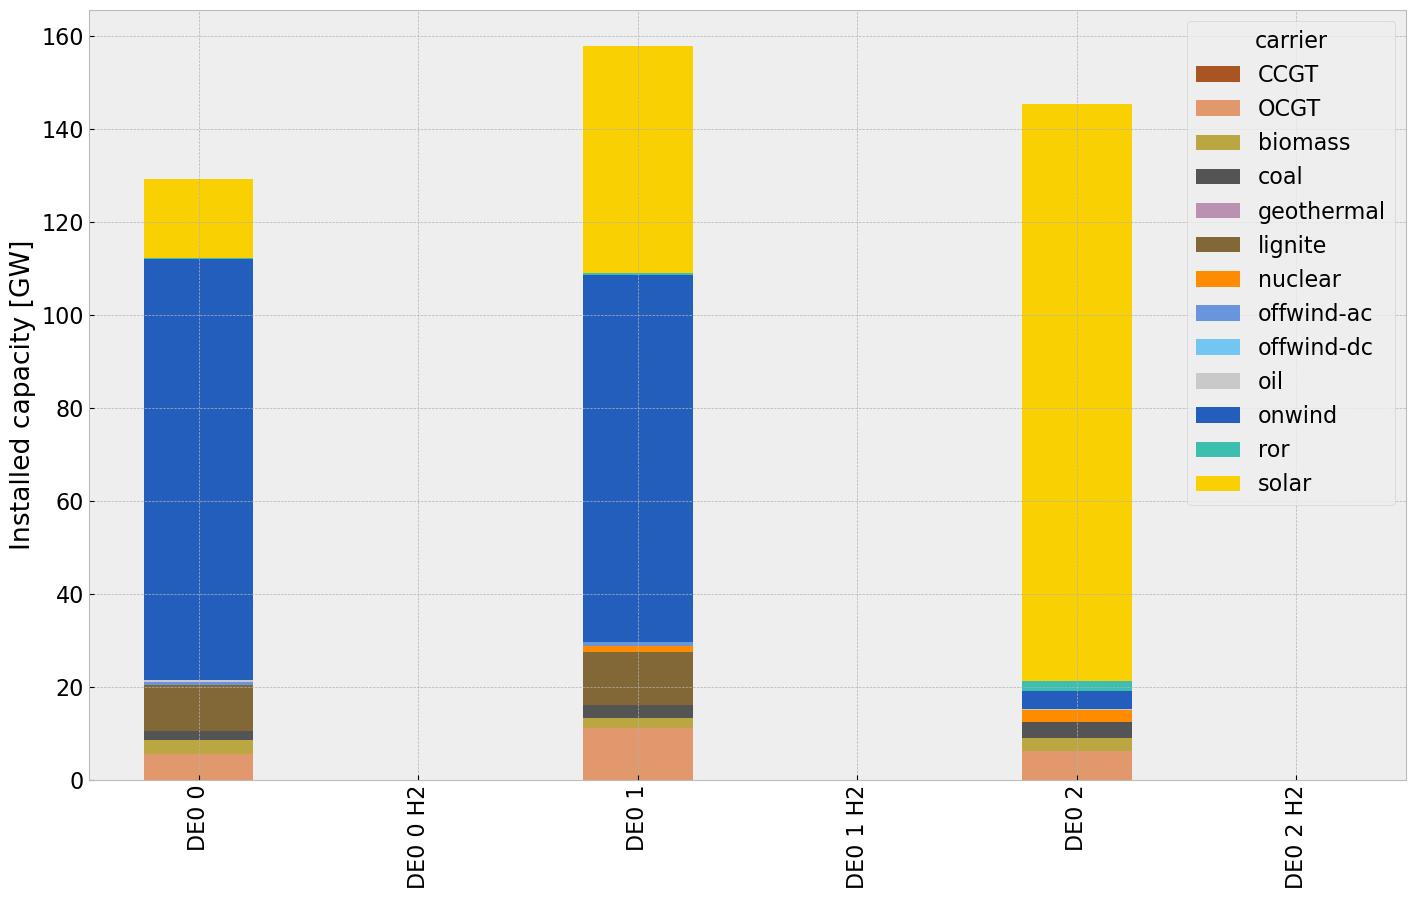

<Figure size 640x480 with 0 Axes>

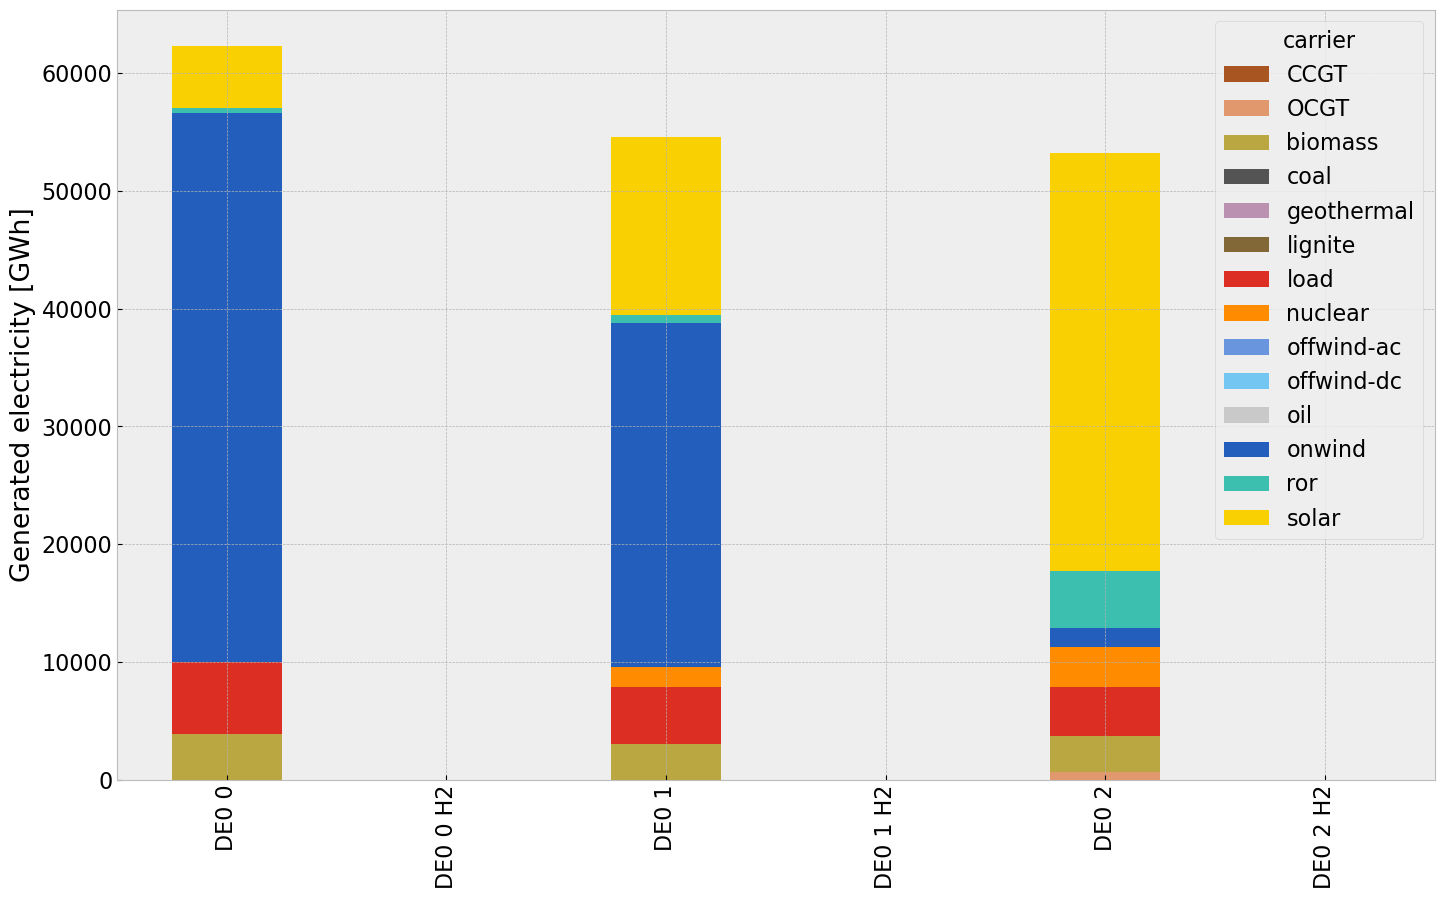

In [330]:
capacities_rol = inst_cap_table(n1, color_cap)
gen_rol = gen_power_table(n1,colors_gen_table)

## Emission

In [331]:
em_rol = em_table(n1)
em_rol

,Generation in MWh,efficiency,emissions in Tonnes CO2/MWh,emissions in Tonnes CO2
carrier,,,,
CCGT,0.000000e+00,0.580000,0.1980,0.000000
OCGT,6.491718e+05,0.498516,0.1980,257837.549384
biomass,9.947157e+06,0.468000,0.0000,0.000000
coal,0.000000e+00,0.329687,0.3361,0.000000
geothermal,0.000000e+00,1.000000,0.1200,0.000000
lignite,3.877686e+04,0.362723,0.4069,43499.610888
load,1.511637e+07,1.000000,0.0000,0.000000
nuclear,5.117966e+06,0.328667,0.0000,0.000000
offwind-ac,0.000000e+00,1.000000,0.0000,0.000000


In [332]:
em_rol['emissions in Tonnes CO2'].sum()

301337.16027171595

CO2 emission is at 60.7 Mill. Tonnes, which is lower than the global constraint of 90 Mill. Tonnes

# Comparison between both scenarios

## Installed Capacity

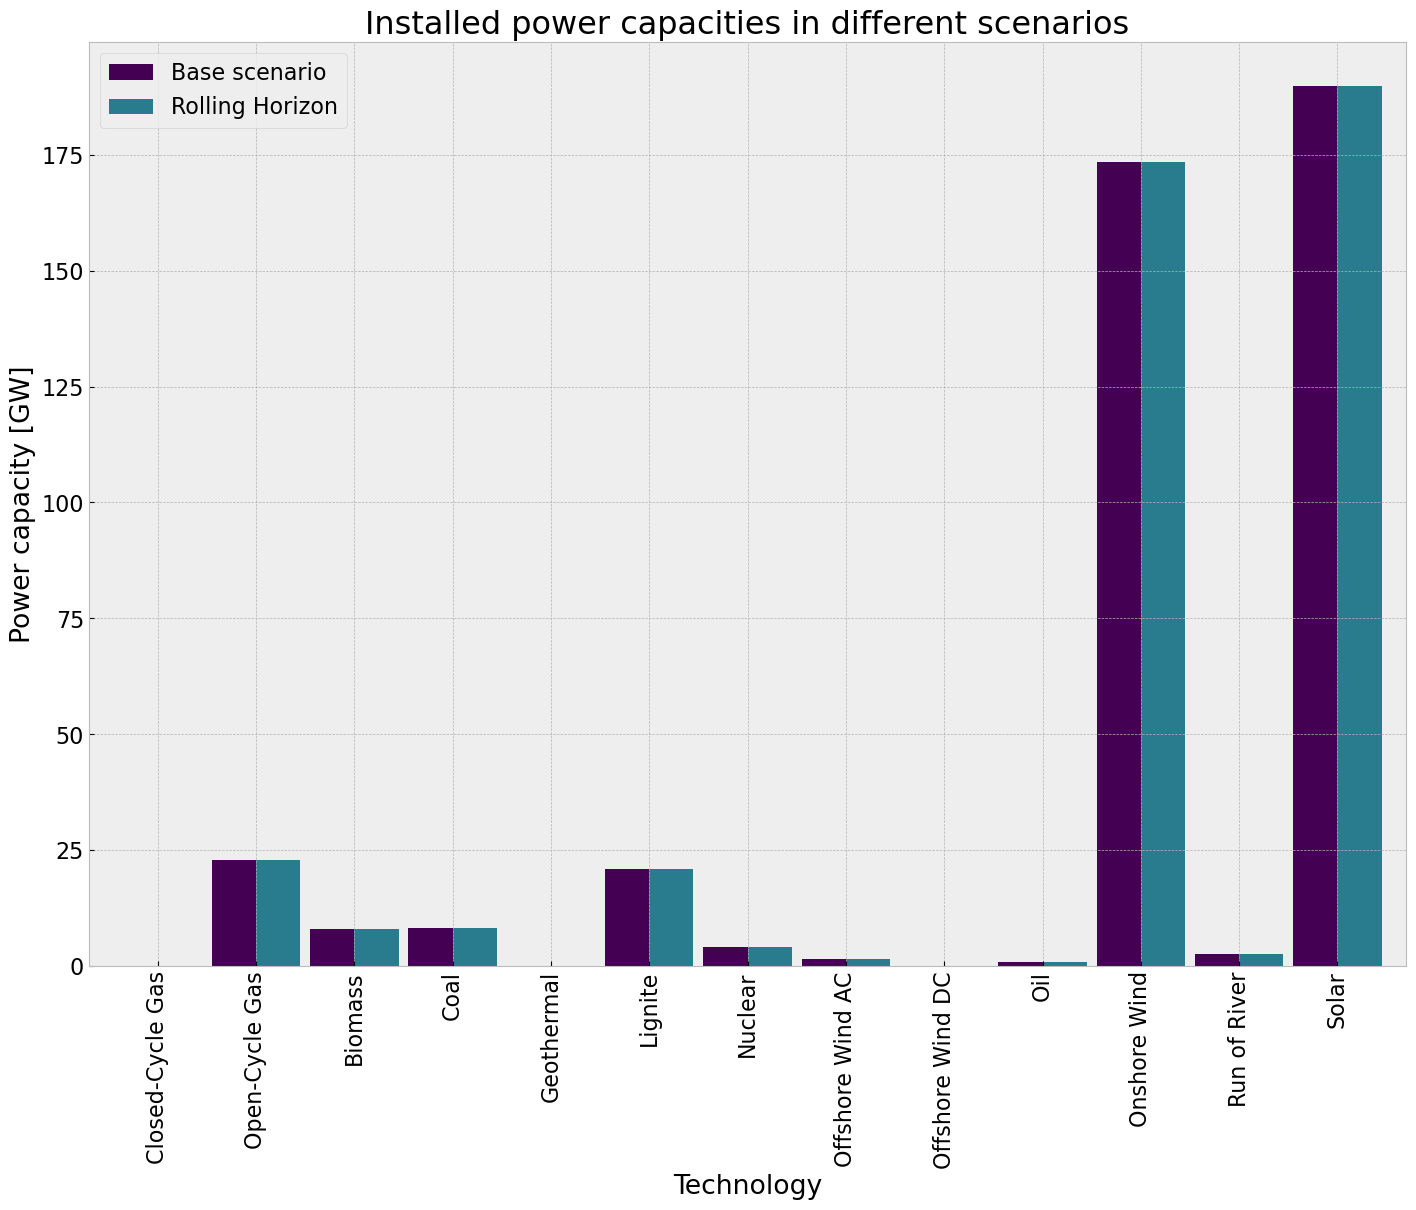

In [333]:
comp_inst_cap = pd.DataFrame(index=capacities_base.unstack().drop(columns=['load'],inplace=False).columns)

comp_inst_cap["Base scenario"] = capacities_base.groupby("carrier").sum().div(1e3).drop(index="load")
comp_inst_cap["Rolling Horizon"] = capacities_rol.groupby("carrier").sum().div(1e3).drop(index="load")


comp_inst_cap.rename(index = {"coal": "Coal"}, inplace=True)
comp_inst_cap.rename(index = {"OCGT": "Open-Cycle Gas"}, inplace=True)
comp_inst_cap.rename(index = {"CCGT": "Closed-Cycle Gas"}, inplace=True)
comp_inst_cap.rename(index = {"ror": "Run of River"}, inplace=True)
comp_inst_cap.rename(index = {"offwind-ac": "Offshore Wind AC"}, inplace=True)
comp_inst_cap.rename(index = {"offwind-dc": "Offshore Wind DC"}, inplace=True)
comp_inst_cap.rename(index = {"onwind": "Onshore Wind"}, inplace=True)
comp_inst_cap.rename(index = {"solar": "Solar"}, inplace=True)
comp_inst_cap.rename(index = {"oil": "Oil"}, inplace=True)
comp_inst_cap.rename(index = {"geothermal": "Geothermal"}, inplace=True)
comp_inst_cap.rename(index = {"nuclear": "Nuclear"}, inplace=True)
comp_inst_cap.rename(index = {"biomass": "Biomass"}, inplace=True)
comp_inst_cap.rename(index = {"lignite": "Lignite"}, inplace=True)

comp_inst_cap.fillna(0, inplace=True)

comp_inst_cap.plot.bar(figsize=(17,12),
                        color=cm.viridis(np.linspace(0, 5, len(comp_inst_cap))),
                        grid=True,
                        xlabel="Technology",
                        ylabel="Power capacity [GW]",
                        title=f"Installed power capacities in different scenarios",
                        #ylim=[0,350],
                        width=0.9
)
plt.show()

carrier,PHS,battery,hydro
bus,,,
DE0 0,2.87980,0.000000,NaN
DE0 1,2.22142,0.000000,NaN
DE0 2,2.49800,16.468654,0.2895


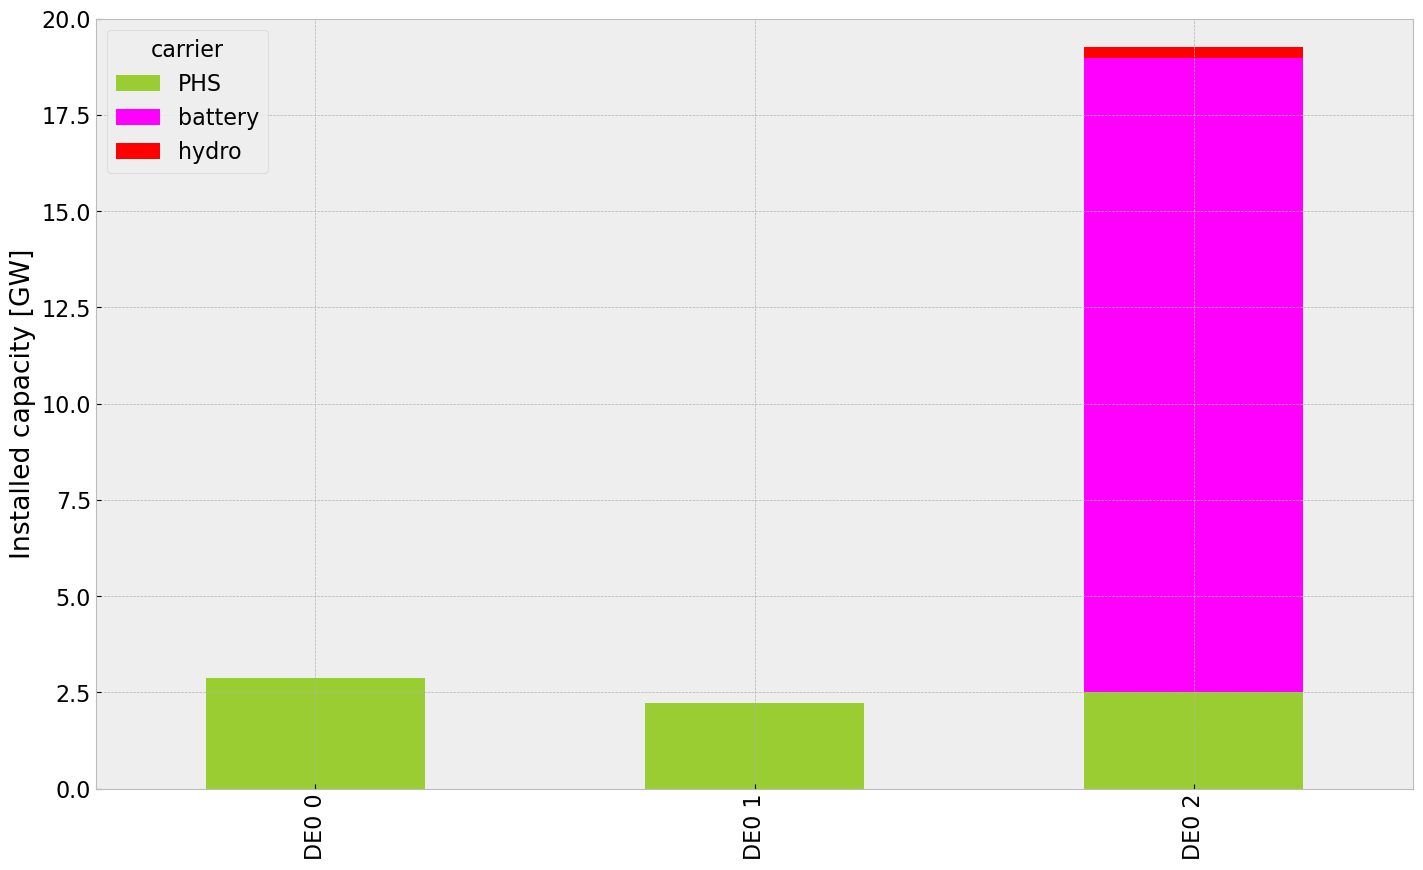

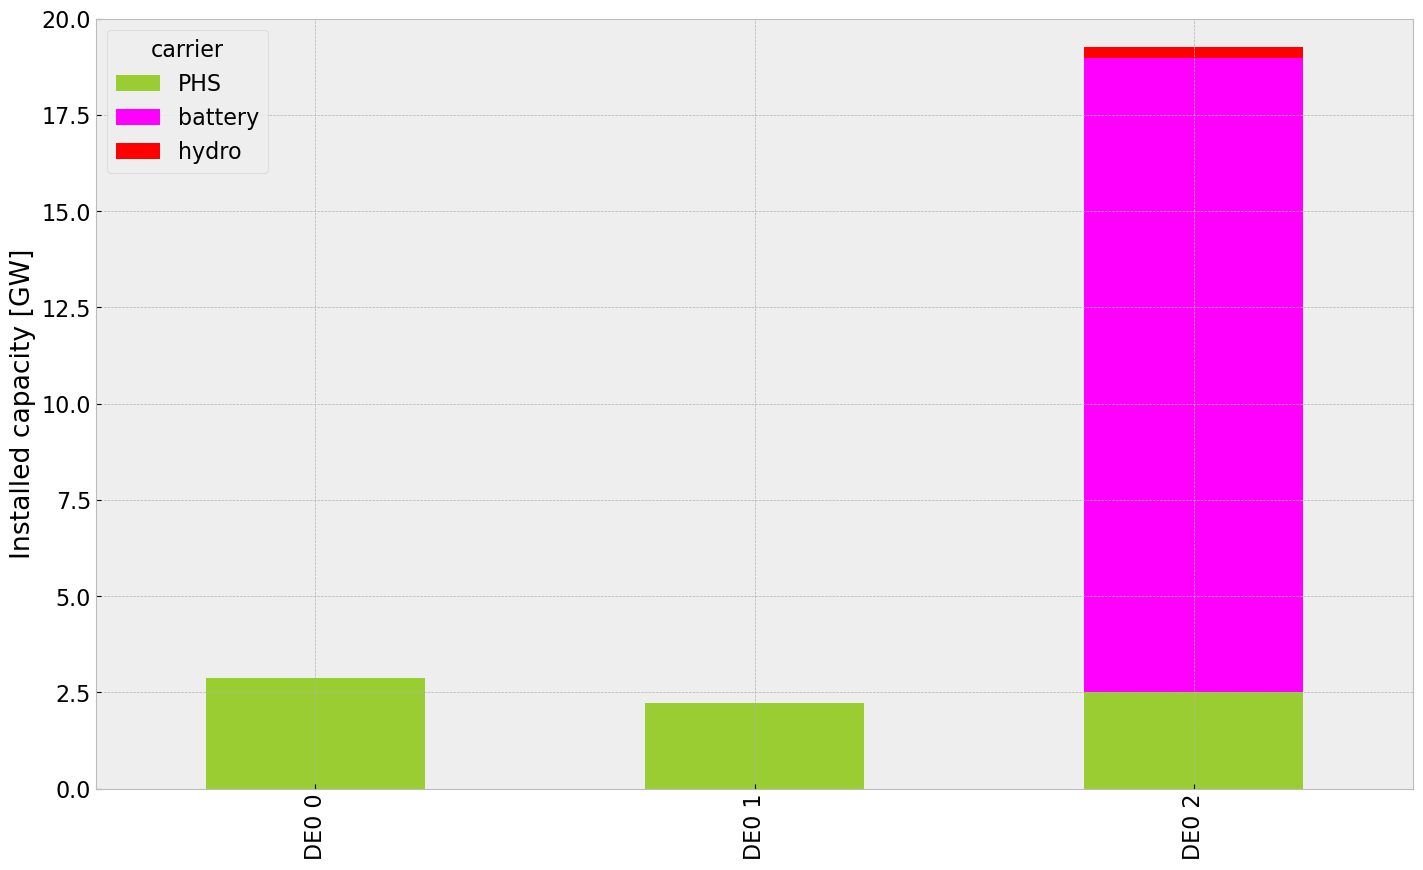

In [334]:
#Storage unit installed capcities

def inst_store_table(n):
    
    plt.rcParams.update({'font.size': 16})

    (n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=["yellowgreen","magenta","red","blue"],
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                #title=f"Installed power capacities of storage systems in Italy in {year}",
                                ylim=[0,20]
    )

    return n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000

inst_store_table(n)
inst_store_table(n1)

carrier,H2
bus,
DE0 0 H2,8771.804708
DE0 1 H2,7987.084763
DE0 2 H2,3436.666683


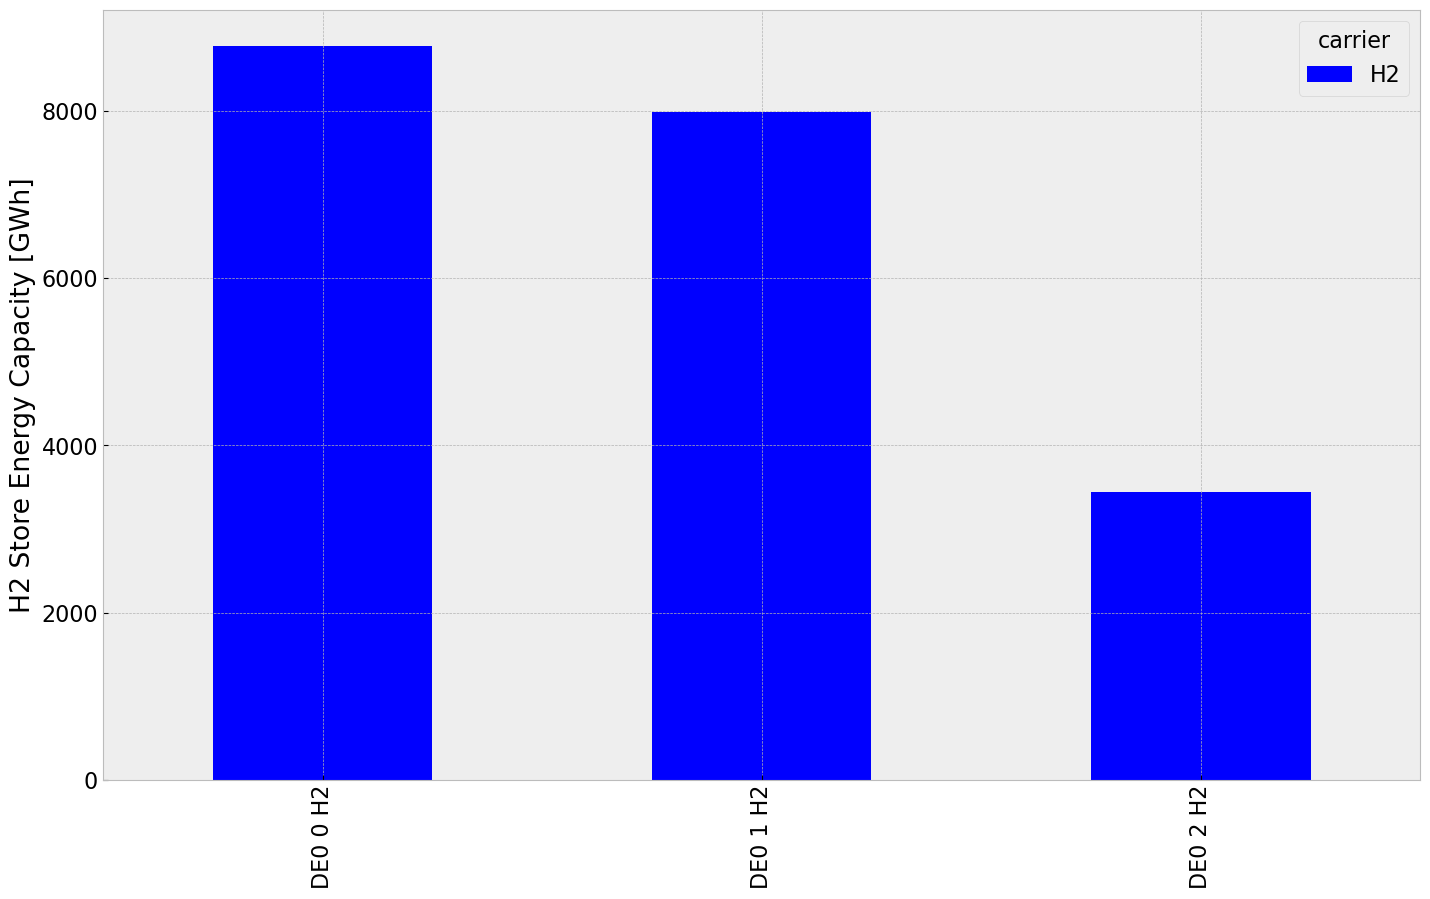

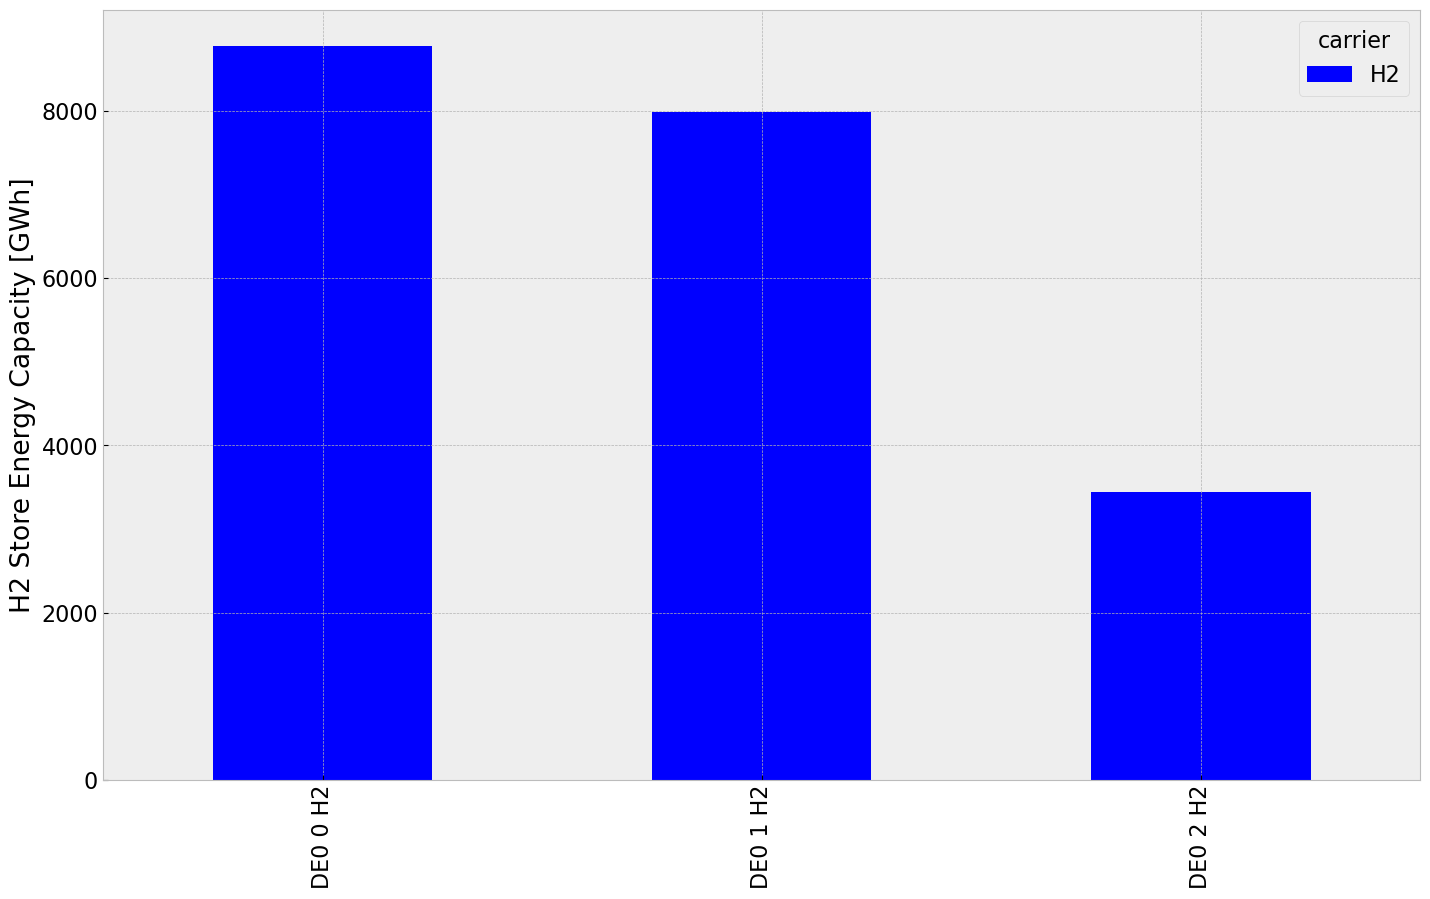

In [335]:
#stores installed capacitites

def inst_storeh2_table(n):
    
    plt.rcParams.update({'font.size': 16})

    (n.stores.groupby(['bus','carrier']).e_nom_opt.sum().unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=["blue"],
                                grid=True,
                                xlabel="",
                                ylabel="H2 Store Energy Capacity [GWh]",
                                #title=f"Installed power capacities of storage systems in Italy in {year}",
                                #ylim=[0,7500]
    )

    return n.stores.groupby(['bus','carrier']).e_nom_opt.sum().unstack()/1000

inst_storeh2_table(n)
inst_storeh2_table(n1)

## Generation

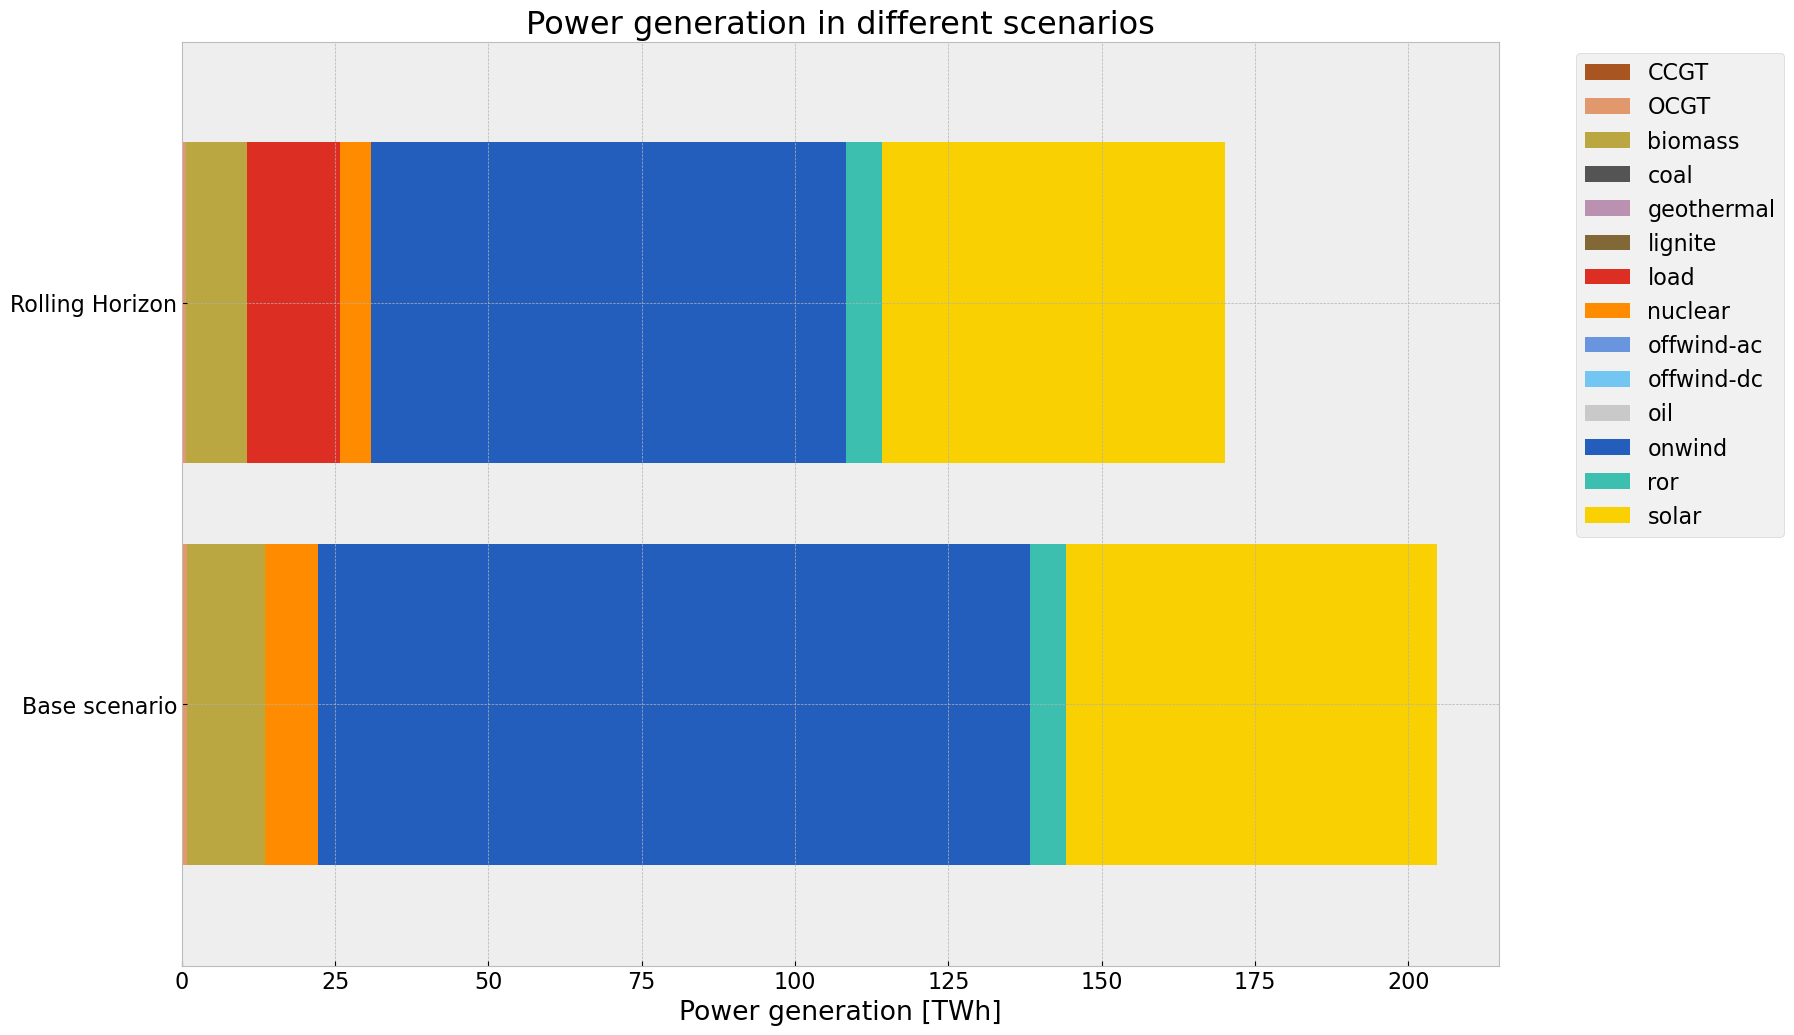

In [336]:
comp_gen_electr = pd.DataFrame(index = ["Base scenario", "Rolling Horizon"],
                                columns = tech_list_gen_table)

comp_gen_electr.loc["Base scenario"] = gen_base.sum().div(1e3) # TWh/a
comp_gen_electr.loc["Rolling Horizon"] = gen_rol.sum().div(1e3) # TWh/a
#comp_gen_electr.loc["No add Inv"] = gen_noinv.sum().div(1e3) # TWh/a
#comp_gen_electr.loc["No add Inv Rolling Horizon"] = gen_noinv_roll.sum().div(1e3) # TWh/a


#comp_gen_electr.rename(columns = {"coal": "Coal"}, inplace=True)
#comp_gen_electr.rename(columns = {"gas": "Gas"}, inplace=True)
#comp_gen_electr.rename(columns = {"hydro": "Hydro"}, inplace=True)
#comp_gen_electr.rename(columns = {"offwind": "Offshore Wind"}, inplace=True)
#comp_gen_electr.rename(columns = {"onwind": "Onshore Wind"}, inplace=True)
#comp_gen_electr.rename(columns = {"solar": "Solar"}, inplace=True)
#comp_gen_electr.rename(columns = {"oil": "Oil"}, inplace=True)
#comp_gen_electr.rename(columns = {"geothermal": "Geothermal"}, inplace=True)
#comp_gen_electr.rename(columns = {"nuclear": "Nuclear"}, inplace=True)

comp_gen_electr.fillna(0, inplace=True)
comp_gen_electr.plot.barh(figsize=(17,12),
                        color=colors_gen_table,
                        grid=True,
                        stacked=True, 
                        ylabel="",
                        xlabel="Power generation [TWh]",
                        title=f"Power generation in different scenarios",
                        #xlim=[0,200],
                        width=0.8
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# System Cost

In [337]:
system_cost_rol

carrier
Combined-Cycle Gas               NaN
Load shedding           1.360473e+05
Offshore Wind (AC)               NaN
Offshore Wind (DC)               NaN
Onshore Wind            1.763169e+04
Open-Cycle Gas          1.198111e+03
Run of River            7.971637e+02
Solar                   7.464367e+03
biomass                 2.829703e+03
coal                             NaN
geothermal                       NaN
lignite                 7.082459e+03
nuclear                 3.278249e+03
oil                              NaN
AC                               NaN
DC                               NaN
H2 electrolysis         1.036244e-15
H2 fuel cell            6.065222e-16
Battery Storage         1.680778e+03
Pumped Hydro Storage    1.388429e+03
Reservoir & Dam         5.291019e+01
Hydrogen Storage        2.995383e+03
dtype: float64

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_21808\2096275227.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comp_system_cost.fillna(0, inplace=True)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_21808\2096275227.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if comp_system_cost.columns[i] == n.carriers.nice_name[j]:
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_21808\2096275227.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a 

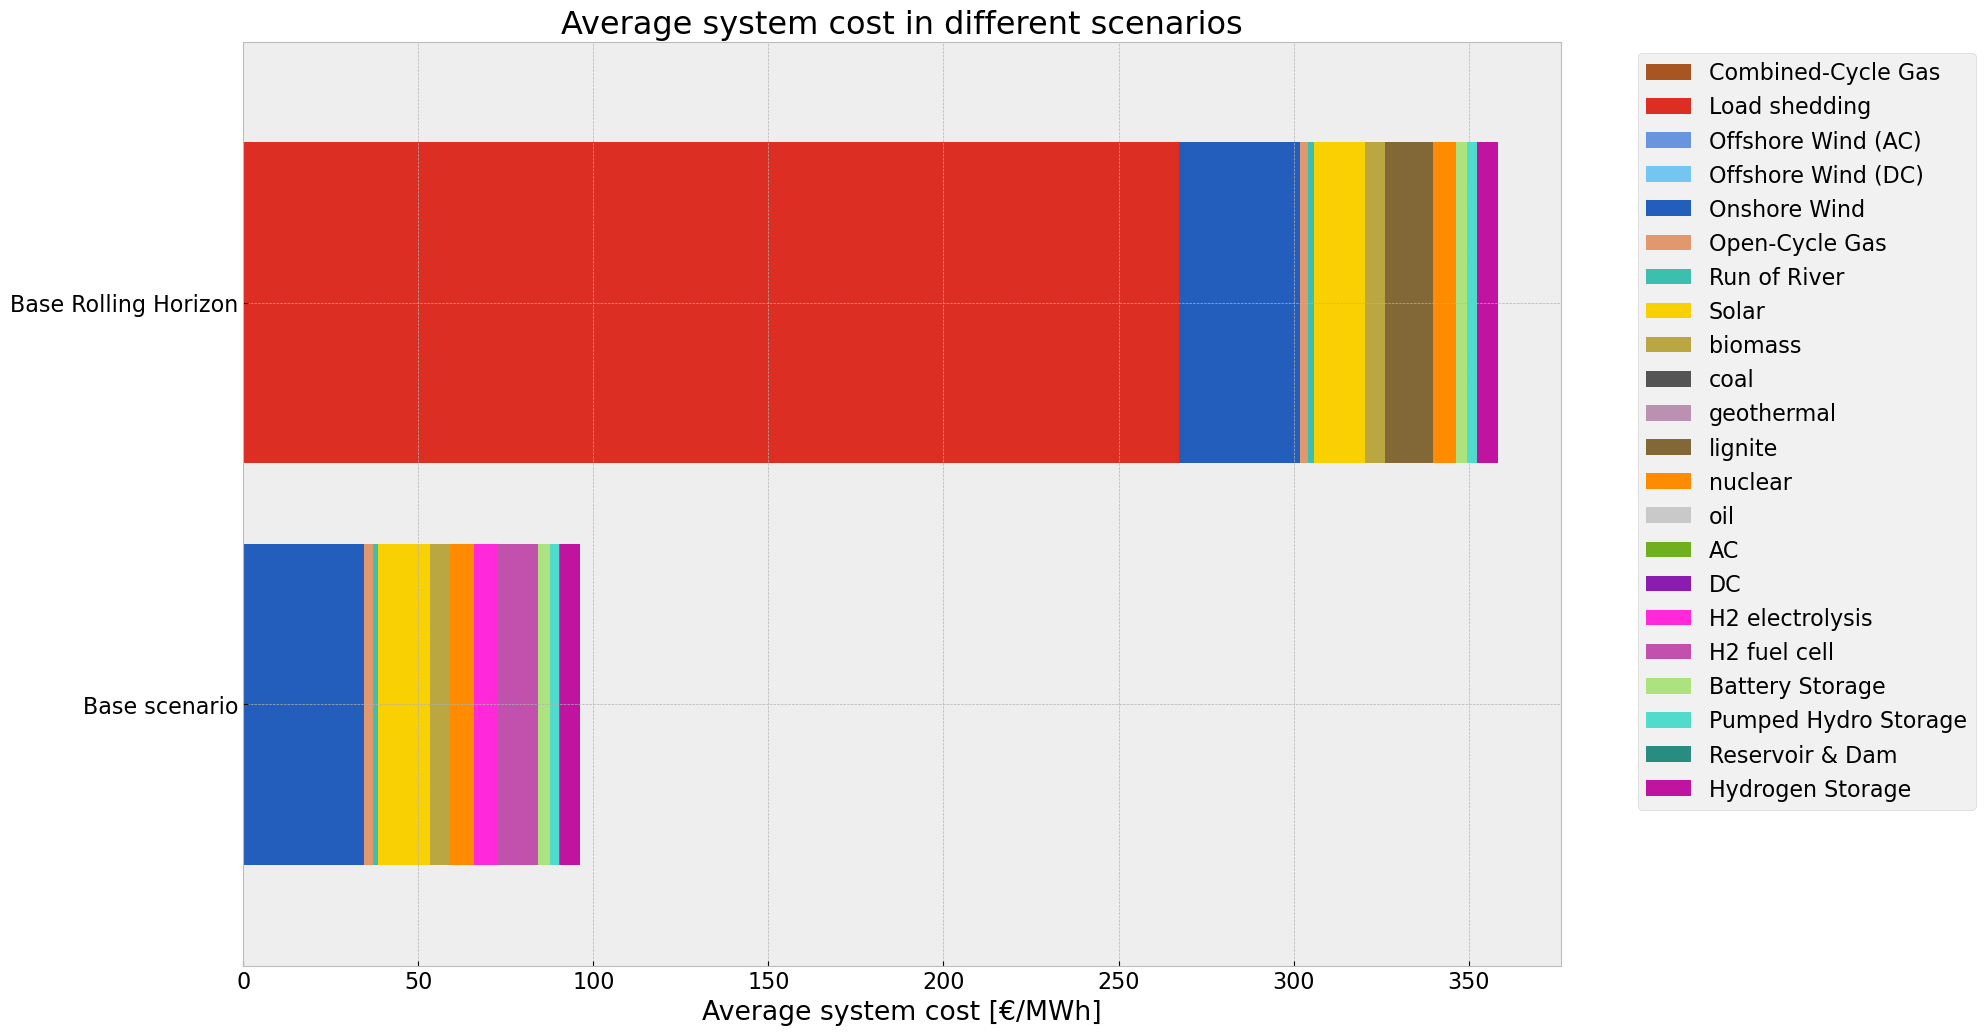

In [338]:
tech_comp = system_cost_base.index.tolist()
comp_system_cost = pd.DataFrame(index = ["Base scenario", "Base Rolling Horizon"],
                                columns =tech_comp)

demand = n.snapshot_weightings.generators @ n.loads_t.p_set.sum(axis=1) # the same in each scenario

comp_system_cost.loc["Base scenario"] = system_cost_base # Million €/a
comp_system_cost.loc["Base Rolling Horizon"] = system_cost_rol # Million €/a


if 'AC' in system_cost_base:
    comp_system_cost.AC = comp_system_cost.AC-system_cost_base.AC # expenditure for already existing transmission lines

comp_system_cost[comp_system_cost<0] = 0 # since we subtact the AC cost (for the 0% or 20%) 
#comp_system_cost.iloc[0,0] = system_cost_base.AC


comp_system_cost = comp_system_cost.mul(1e6).div(demand) #eur0/

#comp_system_cost.rename(columns = {"battery storage": "Battery storage"}, inplace=True)
#comp_system_cost.rename(columns = {"hydrogen storage underground": "Hydrogen storage underground"}, inplace=True)

comp_system_cost.fillna(0, inplace=True)

colors_comp = []

for i in range(len(comp_system_cost.columns)):
    for j in range(len(n.carriers.nice_name)):
        if comp_system_cost.columns[i] == n.carriers.nice_name[j]:
            colors_comp.append(n.carriers.color[j])
            #print(n.carriers.nice_name[j],comp_system_cost.columns[i],n.carriers.color[j])
            break  # break the inner loop once a match is found  



comp_system_cost.plot.barh(figsize=(17,12),
                        color=colors_comp,
                        grid=True,
                        stacked=True,
                        ylabel="",
                        xlabel="Average system cost [€/MWh]",
                        title=f"Average system cost in different scenarios",
                        #xlim=[0,200],
                        width=0.8
)
# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Emission

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_21808\1866422755.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_comp.append(n.carriers.color[j])


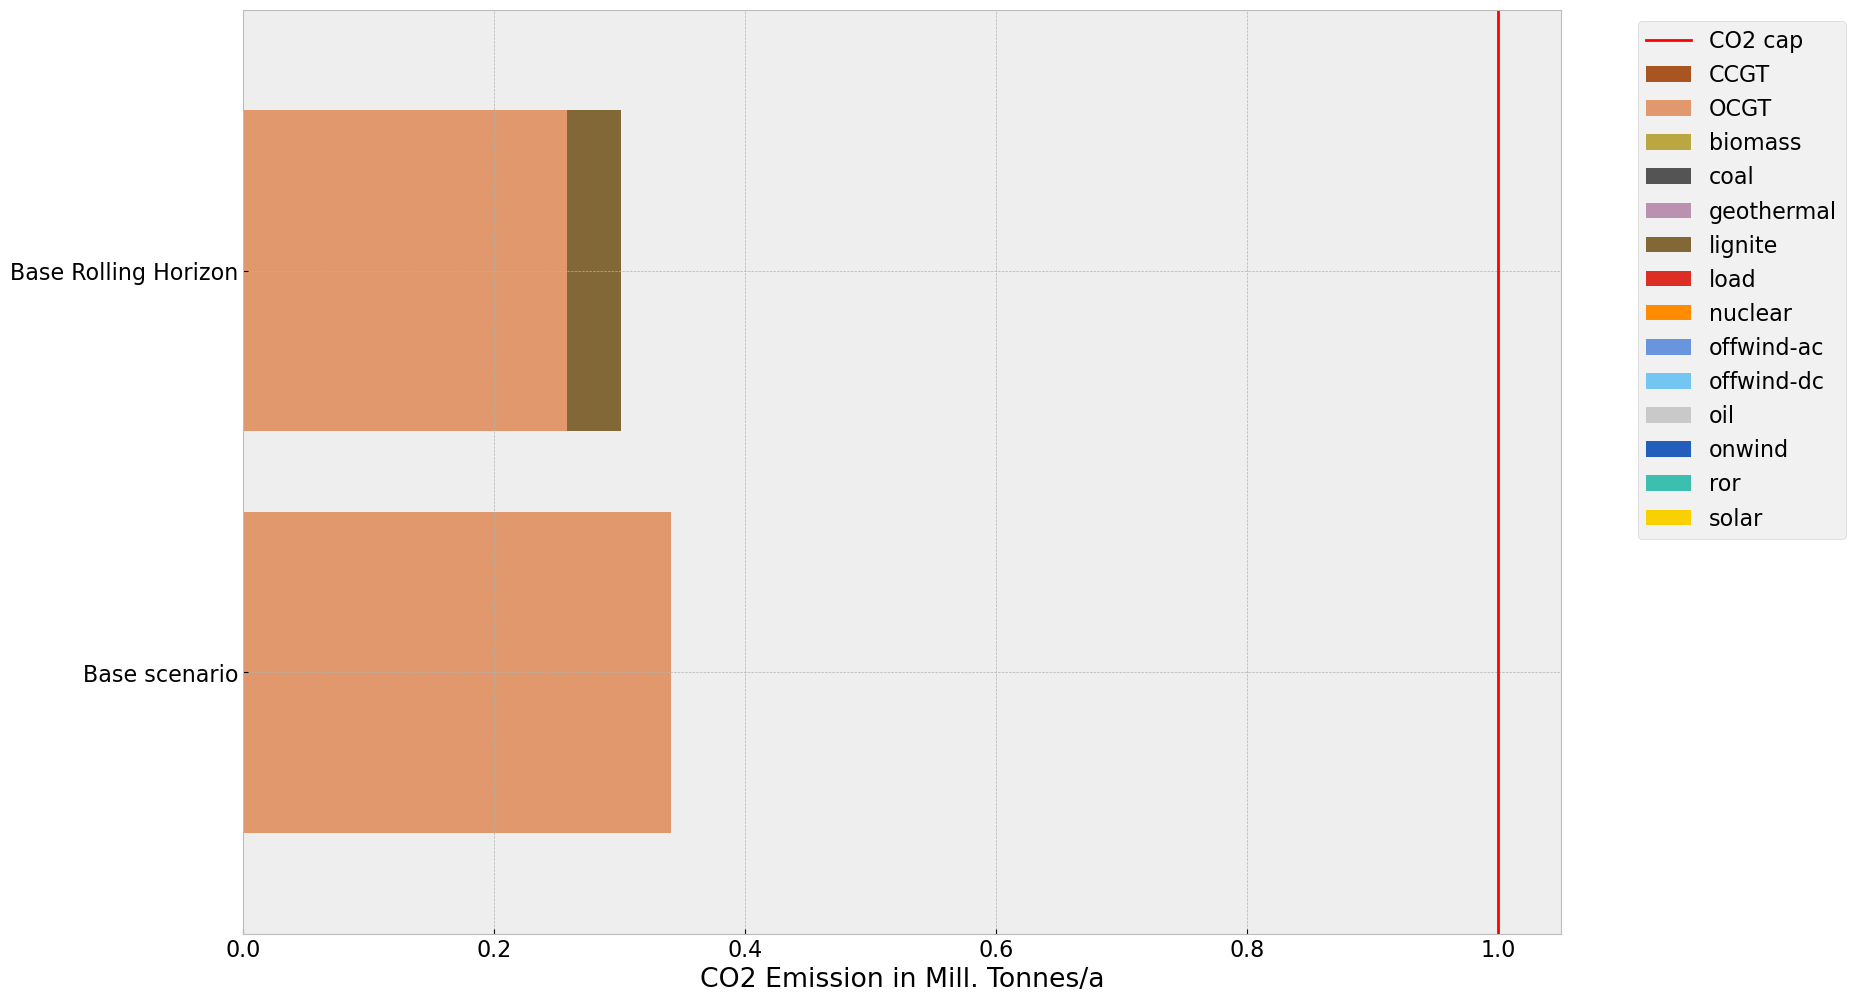

In [339]:
tech_comp = em_base.index.tolist()
comp_system_em = pd.DataFrame(index = ["Base scenario", "Base Rolling Horizon"],
                                columns =tech_comp)

#demand = n.snapshot_weightings.generators @ n.loads_t.p_set.sum(axis=1) # the same in each scenario

comp_system_em.loc["Base scenario"] = em_base['emissions in Tonnes CO2']/1e6 # Mill. Tonnes CO2 /a
comp_system_em.loc["Base Rolling Horizon"] = em_rol['emissions in Tonnes CO2'] /1e6 # Mill. Tonnes CO2 /a

comp_system_em.fillna(0, inplace=True)

colors_comp = []

for i in range(len(comp_system_em.columns)):
    for j in range(len(n.carriers.index)):
        if comp_system_em.columns[i] == n.carriers.index[j]:
            colors_comp.append(n.carriers.color[j])
            #print(n.carriers.nice_name[j],comp_system_cost.columns[i],n.carriers.color[j])
            break  # break the inner loop once a match is found  



comp_system_em.plot.barh(figsize=(17,12),
                        color=colors_comp,
                        grid=True,
                        stacked=True,
                        ylabel="",
                        xlabel="CO2 Emission in Mill. Tonnes/a",
                        #title=f"Average system cost in different scenarios",
                        #xlim=[0,100],
                        width=0.8
)
#global_constraint
plt.axvline(x=n.global_constraints.loc['CO2Limit','constant']/1e6, color='r', linestyle='-', linewidth=2, label='CO2 cap')
# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [340]:
em_base

,Generation in MWh,efficiency,emissions in Tonnes CO2/MWh,emissions in Tonnes CO2
carrier,,,,
CCGT,0.000000e+00,0.580000,0.1980,0.000000
OCGT,8.594838e+05,0.498516,0.1980,341369.075942
biomass,1.275923e+07,0.468000,0.0000,0.000000
coal,0.000000e+00,0.329687,0.3361,0.000000
geothermal,0.000000e+00,1.000000,0.1200,0.000000
lignite,0.000000e+00,0.362723,0.4069,0.000000
load,0.000000e+00,1.000000,0.0000,0.000000
nuclear,8.601949e+06,0.328667,0.0000,0.000000
offwind-ac,0.000000e+00,1.000000,0.0000,0.000000


In [341]:
em_rol

,Generation in MWh,efficiency,emissions in Tonnes CO2/MWh,emissions in Tonnes CO2
carrier,,,,
CCGT,0.000000e+00,0.580000,0.1980,0.000000
OCGT,6.491718e+05,0.498516,0.1980,257837.549384
biomass,9.947157e+06,0.468000,0.0000,0.000000
coal,0.000000e+00,0.329687,0.3361,0.000000
geothermal,0.000000e+00,1.000000,0.1200,0.000000
lignite,3.877686e+04,0.362723,0.4069,43499.610888
load,1.511637e+07,1.000000,0.0000,0.000000
nuclear,5.117966e+06,0.328667,0.0000,0.000000
offwind-ac,0.000000e+00,1.000000,0.0000,0.000000


In [342]:
len(n.snapshots)

2920